<a href="https://colab.research.google.com/github/Karim-Anwar/masterProject/blob/main/EDA_one__room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###THIS NOTEBOOK IS FOR DOING EDA ON THREE DIFFRENT ROOM LOCATIONS FORM THE LAB42 BUILDING


> The rooms we are looking at are room are all on the 6th floor and looking South of the building directly towards the outside and are adjacent or reletavely adjacent



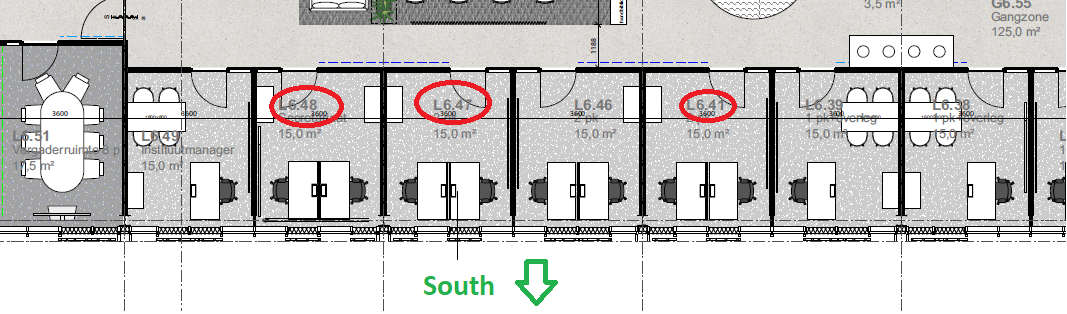

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy
import datetime

In [3]:
east = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/UvA_LAB42_450000_TL101010.csv', names = ['seq', 'time', 'value'])
north = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/UvA_LAB42_450000_TL101009.csv', names = ['seq', 'time', 'value'])
south = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/UvA_LAB42_450000_TL101011.csv', names = ['seq', 'time', 'value'])
west = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/UvA_LAB42_450000_TL101012.csv', names = ['seq', 'time', 'value'])

###Room 48 sixth floor data analysis

In [4]:
# Load your data here
shades_48 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N48_S/UvA_LAB42_460600_TL261.csv', names = ['seq', 'time', 'value'])
roomlight_48 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N48_S/UvA_LAB42_460600_TL262.csv', names = ['seq', 'time', 'value'])
PIR_48 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N48_S/UvA_LAB42_460600_TL2.csv', names = ['seq', 'time', 'value'])

In [5]:
shades_48['time'] = pd.to_datetime(shades_48['time'])
roomlight_48['time'] = pd.to_datetime(roomlight_48['time'])
PIR_48['time'] = pd.to_datetime(PIR_48['time'])
north['time'] = pd.to_datetime(north['time'])
south['time'] = pd.to_datetime(south['time'])
east['time'] = pd.to_datetime(east['time'])
west['time'] = pd.to_datetime(west['time'])

In [6]:
day = shades_48.drop(['seq'], axis=1).set_index('time')
room = roomlight_48.drop(['seq'], axis=1).set_index('time')
PIr = PIR_48.drop(['seq'], axis=1).set_index('time')
nortH = north.drop(['seq'], axis=1).set_index('time')
soutH =south.drop(['seq'], axis=1).set_index('time')
easT = east.drop(['seq'], axis=1).set_index('time')
wesT = west.drop(['seq'], axis=1).set_index('time')

In [7]:
allignedDay = day[day.index >= '2023-03-22 00:20:00']
allignedRoom = room[room.index >= '2023-03-22 00:20:00']
pir = PIr[PIr.index >= '2023-03-22 00:20:00']

In [8]:
# fig, axs = plt.subplots(7, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(allignedDay)
# axs[0].set_title('Day')
# axs[1].plot(allignedRoom)
# axs[1].set_title('Room')
# axs[2].step(pir.index, pir)
# axs[2].set_title('PIR/Activation of room sensor')
# axs[3].plot(nortH)
# axs[3].set_title('North daylight')
# axs[4].plot(soutH)
# axs[4].set_title('South daylight')
# axs[5].plot(easT)
# axs[5].set_title('East daylight')
# axs[6].plot(wesT)
# axs[6].set_title('West daylight')


Here we analyze for specific days to see if there is a pattern

In [9]:
#the room is facing south so I am looking for patterns with the days with the highest recorded value and the lowest recorded value(at the same time as the highest otherwise it is 0)
soutH.idxmax()

value   2023-03-23 13:00:00
dtype: datetime64[ns]

In [10]:
# fig, axs = plt.subplots(7, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))

# axs[0].plot(allignedDay['2023-03-23'])
# axs[0].set_title('Day')

# axs[1].plot(allignedRoom['2023-03-23'])
# axs[1].set_title('Room')

# axs[2].step(pir['2023-03-23'].index, pir['2023-03-23'])
# axs[2].set_title('PIR')

# axs[3].plot(nortH['2023-03-23'])
# axs[3].set_title('North daylight')

# axs[4].plot(soutH['2023-03-23'])
# axs[4].set_title('South daylight')

# axs[5].plot(easT['2023-03-23'])
# axs[5].set_title('East daylight')

# axs[6].plot(wesT['2023-03-23'])
# axs[6].set_title('West daylight')

In [11]:
# fig, axs = plt.subplots(4, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))

# axs[0].plot(allignedDay['2023-03-23':'2023-03-30'])
# axs[0].set_title('Day')

# axs[1].plot(allignedRoom['2023-03-23':'2023-03-30'])
# axs[1].set_title('Room')

# axs[2].step(pir['2023-03-23':'2023-03-30'].index, pir['2023-03-23':'2023-03-30'])
# axs[2].set_title('PIR')


# axs[3].plot(soutH['2023-03-23':'2023-03-30'])
# axs[3].set_title('South daylight')


In [12]:
# fig, axs = plt.subplots(4, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))

# axs[0].plot(allignedDay['2023-03-24'])
# axs[0].set_title('Day')

# axs[1].plot(allignedRoom['2023-03-24'])
# axs[1].set_title('Room')

# axs[2].step(pir['2023-03-24'].index, pir['2023-03-24'])
# axs[2].set_title('PIR')

# axs[3].plot(soutH['2023-03-24'])
# axs[3].set_title('South daylight')



In [13]:
# pir2 =pir
# pir2['n'] = 1

In [14]:
# pir2.n.resample('D').sum()

In [15]:
# fig, axs = plt.subplots(7, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))

# axs[0].plot(allignedDay['2023-03-28'])
# axs[0].set_title('Day')

# axs[1].plot(allignedRoom['2023-03-28'])
# axs[1].set_title('Room')

# axs[2].step(pir['2023-03-28'].index, pir['2023-03-28'])
# axs[2].set_title('PIR')

# axs[3].plot(nortH['2023-03-28'])
# axs[3].set_title('North daylight')

# axs[4].plot(soutH['2023-03-28'])
# axs[4].set_title('South daylight')

# axs[5].plot(easT['2023-03-28'])
# axs[5].set_title('East daylight')

# axs[6].plot(wesT['2023-03-28'])
# axs[6].set_title('West daylight')

In [16]:
# fig, axs = plt.subplots(4, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))

# axs[0].plot(allignedDay['2023-03-28'])
# axs[0].set_title('Day')

# axs[1].plot(allignedRoom['2023-03-28'])
# axs[1].set_title('Room')

# axs[2].step(pir['2023-03-28'].index, pir['2023-03-28'])
# axs[2].set_title('PIR')

# axs[3].plot(soutH['2023-03-28'])
# axs[3].set_title('South daylight')


In [17]:
meteo = pd.read_excel('/content/drive/MyDrive/exploratory-data-analysis/06_38/Climate240.xlsx', skiprows=27)

In [18]:
meteo.head()

ID []             Local [] Irradiance [W/m^2] T_ambient [Degrees Celsius]  \
0     1  2023-01-01 00:30:00                  0                       3.871   
1     2  2023-01-01 01:30:00                  0                       3.676   
2     3  2023-01-01 02:30:00                  0                       3.523   
3     4  2023-01-01 03:30:00                  0                       3.564   
4     5  2023-01-01 04:30:00                  0                        3.58   

  T_ground [Degrees Celsius] Wind [m/s] Cloud [okta] Pressure [Pa]  \
0                      2.581      5.441        6.376    101520.879   
1                      2.526      5.494        6.112    101523.694   
2                       2.43      5.631        5.609    101519.927   
3                      2.349      5.747        5.727    101513.477   
4                      2.377      5.572        6.095    101508.283   

  Rain [mm/hr] Diffuse [W/m^2] Direct [W/m^2] Elevation [Degrees]  \
0        0.057               0              0             -59.379   
1        0.075               0              0             -54.378   
2         0.09               0              0             -46.964   
3        0.057               0              0             -38.332   
4         0.05               0              0             -29.231   

  Azimuth [Degrees]  
0            21.052  
1             44.76  
2            63.245  
3            77.954  
4            90.471

In [19]:
meteo2 = meteo.drop(columns=['ID []', 'Irradiance [W/m^2]',	'T_ambient [Degrees Celsius]',	'T_ground [Degrees Celsius]',	'Wind [m/s]', 'Pressure [Pa]',	'Rain [mm/hr]',	'Diffuse [W/m^2]', 'Direct [W/m^2]',	'Elevation [Degrees]',	'Azimuth [Degrees]'])

In [20]:
meteo2 = meteo2.rename(columns={"Local []": "time"}).iloc[:8784]

In [21]:
meteo2['time']=meteo2['time'].astype(str) 

In [22]:
meteo2['time'].str.startswith('2023-02-29')

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Name: time, Length: 8784, dtype: bool

In [23]:
meteo2.drop(meteo2.loc[meteo2['time'].str.startswith('2023-02-29')].index, inplace=True)

In [24]:
meteo2['time'] = pd.to_datetime(meteo2['time'], yearfirst=True)

In [25]:
meteo2 = meteo2.set_index(meteo2['time']).drop(columns=['time'])

In [26]:
# plt.figure(figsize=(25,6))
# plt.plot(meteo2)
# plt.close()

In [27]:
soutH[0:]

value
time                      
2023-03-22 00:20:00      1
2023-03-22 00:30:00      0
2023-03-22 00:40:00      0
2023-03-22 00:50:00      0
2023-03-22 01:00:00      1
...                    ...
2023-05-07 12:50:00  88639
2023-05-07 13:00:00  78140
2023-05-07 13:10:00  40481
2023-05-07 13:20:00  31245
2023-05-07 13:30:00  23764

[6698 rows x 1 columns]

In [28]:
meteo3 = meteo2.loc['2023-03-22 00:20:00': '2023-05-07 13:30:00']

In [29]:
meteo3

Cloud [okta]
time                            
2023-03-22 00:30:00        4.548
2023-03-22 01:30:00          4.7
2023-03-22 02:30:00        4.433
2023-03-22 03:30:00        5.001
2023-03-22 04:30:00        5.183
...                          ...
2023-05-07 09:30:00        4.714
2023-05-07 10:30:00        4.312
2023-05-07 11:30:00        4.817
2023-05-07 12:30:00        4.763
2023-05-07 13:30:00        4.821

[1118 rows x 1 columns]

In [30]:
# fig, axs = plt.subplots(5, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))

# axs[0].plot(allignedDay['2023-03-27'])
# axs[0].set_title('Day')

# axs[1].plot(allignedRoom['2023-03-27'])
# axs[1].set_title('Room')

# axs[2].step(pir['2023-03-27'].index, pir['2023-03-27'])
# axs[2].set_title('PIR')

# axs[3].plot(soutH['2023-03-27'])
# axs[3].set_title('South daylight')

# axs[4].plot(meteo3['2023-03-27'])
# axs[4].set_title('cloud density')

# plt.close()

In [31]:
# fig, axs = plt.subplots(5, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(allignedDay)
# axs[0].set_title('Day/Shading')
# axs[1].plot(allignedRoom)
# axs[1].set_title('Room')
# axs[2].step(pir.index, pir)
# axs[2].set_title('PIR/Activation of room sensor')
# axs[3].plot(soutH)
# axs[3].set_title('South daylight')
# axs[4].plot(meteo3)
# axs[4].set_title('cloud density')

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
#test for stationarity
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

#if the data is not stationary we use diffrencing to make it stationary
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data

In [34]:
test_stationarity(allignedDay, series=True)

'Stationary'

In [35]:
test_stationarity(meteo3, series=True)

'Stationary'

In [36]:
pir3 = pir

In [37]:
pir3 = pir3[~pir3.index.duplicated(keep='first')]

In [38]:
pir3 = pir3.set_index(pir3.index.round("min"))

In [39]:
allignedDay2 = allignedDay

In [40]:
combi = allignedDay2.join(pir3,lsuffix='_shade', rsuffix='_pir', how='left')

In [41]:
combi.describe()

value_shade  value_pir
count  66880.00000  74.000000
mean       6.29876   0.550000
std       22.31683   0.553754
min        0.00000   0.000000
25%        0.00000   0.000000
50%        0.00000   0.550000
75%        0.00000   1.100000
max      100.00000   1.100000

In [42]:
combi.fillna(method='ffill', inplace=True)
combi.fillna(0, inplace=True)

In [43]:
combi.describe()

value_shade     value_pir
count  66880.00000  66880.000000
mean       6.29876      0.128174
std       22.31683      0.352938
min        0.00000      0.000000
25%        0.00000      0.000000
50%        0.00000      0.000000
75%        0.00000      0.000000
max      100.00000      1.100000

In [44]:
# fig, axs = plt.subplots(2, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(combi.drop(columns='value_pir'))
# axs[0].set_title('Shading')
# axs[1].plot(combi.drop(columns='value_shade'))
# axs[1].set_title('PIR')
# plt.close()

###Room 47

In [45]:
# Load your data here
shades_47 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N47_S/UvA_LAB42_460500_TL361.csv', names = ['seq', 'time', 'value'])
roomlight_47 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N47_S/UvA_LAB42_460500_TL362.csv', names = ['seq', 'time', 'value'])
PIR_47 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N47_S/UvA_LAB42_460500_TL3.csv', names = ['seq', 'time', 'value'])

In [46]:
day_47 = shades_47.drop(['seq'], axis=1).set_index('time')
room_47 = roomlight_47.drop(['seq'], axis=1).set_index('time')
PIr_47 = PIR_47.drop(['seq'], axis=1).set_index('time')
pd.to_datetime(PIR_47['time'])

0     2022-11-03 13:48:28
1     2022-11-03 13:49:12
2     2022-11-03 15:58:51
3     2022-11-28 10:09:31
4     2022-11-28 13:19:13
              ...        
758   2023-05-03 22:37:44
759   2023-05-04 08:09:55
760   2023-05-04 09:22:14
761   2023-05-05 08:47:11
762   2023-05-05 09:07:34
Name: time, Length: 763, dtype: datetime64[ns]

In [47]:
day_47 = day_47[day_47.index >= '2023-03-22 00:20:00']
room_47 = room_47[room_47.index >= '2023-03-22 00:20:00']
PIr_47 = PIr_47[PIr_47.index >= '2023-03-22 00:20:00']

In [48]:
# fig, axs = plt.subplots(3, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(day_47)
# axs[0].set_title('Day')
# axs[1].plot(room_47)
# axs[1].set_title('Room')
# axs[2].step(PIr_47.index, PIr_47)
# axs[2].set_title('PIR/Activation of room sensor')
# # axs[3].plot(soutH)
# # axs[3].set_title('North daylight')

In [49]:
# plt.figure(figsize=(25, 6))
# plt.plot(day_47)

In [50]:
# plt.figure(figsize=(25, 6))
# plt.plot(room_47)

In [51]:
# plt.figure(figsize=(25, 6))
# plt.step(PIr_47.index, PIr_47)

In [52]:
# plt.figure(figsize=(25, 6))
# plt.plot(soutH)

##Room 41

In [53]:
# Load your data here
shades_41 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N41_S/UvA_LAB42_460300_TL361.csv', names = ['seq', 'time', 'value'])
roomlight_41 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N41_S/UvA_LAB42_460300_TL362.csv', names = ['seq', 'time', 'value'])
PIR_41 = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/data/6th/06_N41_S/UvA_LAB42_460300_TL3.csv', names = ['seq', 'time', 'value'])

In [54]:
day_41 = shades_41.drop(['seq'], axis=1).set_index('time')
room_41 = roomlight_41.drop(['seq'], axis=1).set_index('time')
PIr_41 = PIR_41.drop(['seq'], axis=1).set_index('time')

In [55]:
day_41 = day_41[day_41.index >= '2023-03-22 00:20:00']
room_41 = room_41[room_41.index >= '2023-03-22 00:20:00']
PIr_41 = PIr_41[PIr_41.index >= '2023-03-22 00:20:00']

In [56]:
# plt.figure(figsize=(25, 6))
# plt.plot(day_41)

In [57]:
# plt.figure(figsize=(25, 6))
# plt.plot(room_41)

In [58]:
# plt.figure(figsize=(25, 6))
# plt.step(PIr_41.index, PIr_41)

In [59]:
# fig, axs = plt.subplots(3, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(day_41)
# axs[0].set_title('Day')
# axs[1].plot(room_41)
# axs[1].set_title('Room')
# axs[2].step(PIr_41.index, PIr_41)
# axs[2].set_title('PIR/Activation of room sensor')

In [60]:
plt.close('all')

#Stats

In [61]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
# Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

In [62]:
# plot_acf(allignedDay)

In [63]:
# plot_acf(allignedRoom)

In [64]:
# plot_pacf(allignedDay, method='ywm')

In [65]:
# plot_pacf(allignedRoom, method='ywm')

In [66]:
PIr_47.index = pd.to_datetime(PIr_47.index)
PIr_41.index = pd.to_datetime(PIr_41.index)

In [67]:
pir
PIr_47
PIr_41

value
time                      
2023-03-22 10:21:59    1.1
2023-03-22 17:15:19    0.0
2023-03-23 09:28:49    1.1
2023-03-23 09:49:45    0.0
2023-03-23 10:11:56    1.1
...                    ...
2023-05-04 11:58:47    0.0
2023-05-04 12:18:14    1.1
2023-05-04 16:57:38    0.0
2023-05-05 08:47:57    1.1
2023-05-05 09:08:25    0.0

[112 rows x 1 columns]

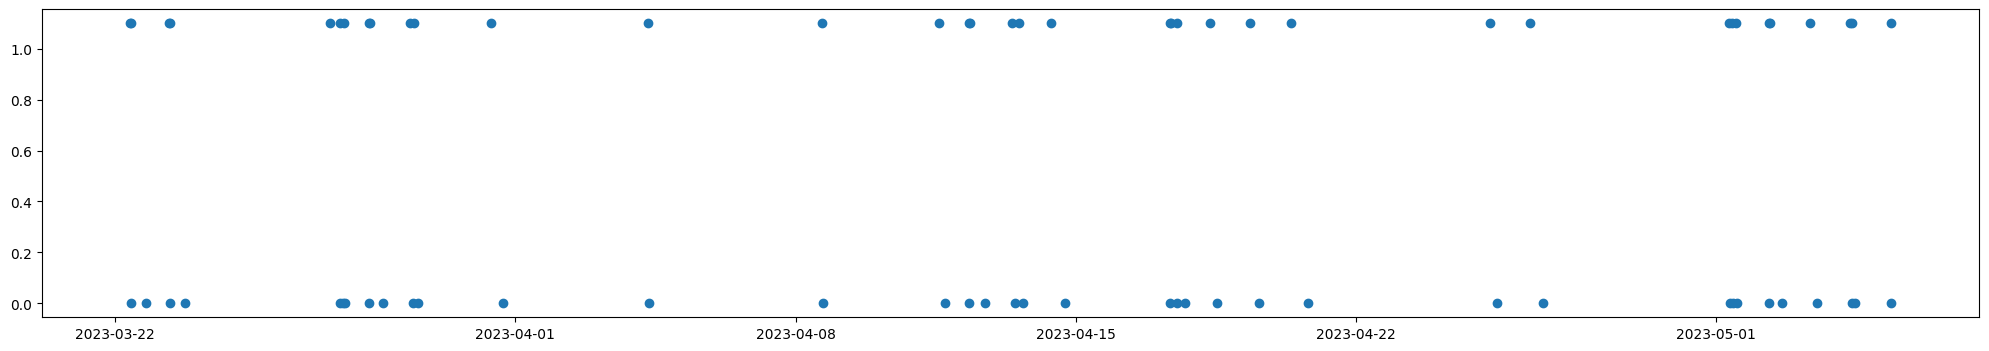

In [68]:
plt.figure(figsize=(25, 4))
plt.scatter(pir.index, pir)

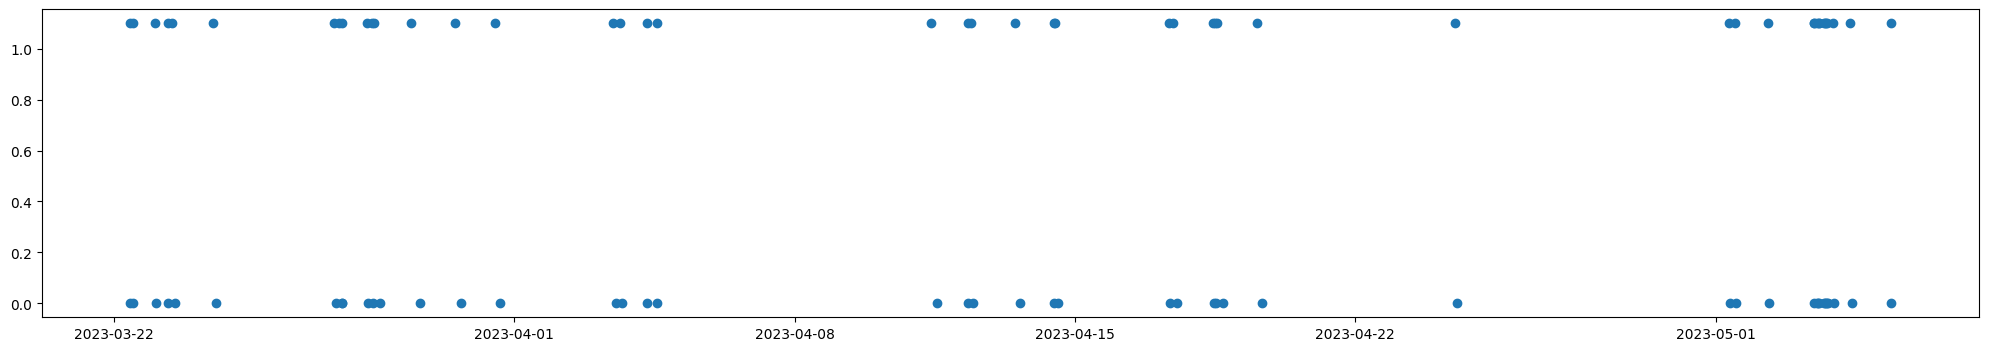

In [69]:
plt.figure(figsize=(25, 4))
plt.scatter(PIr_47.index, PIr_47)

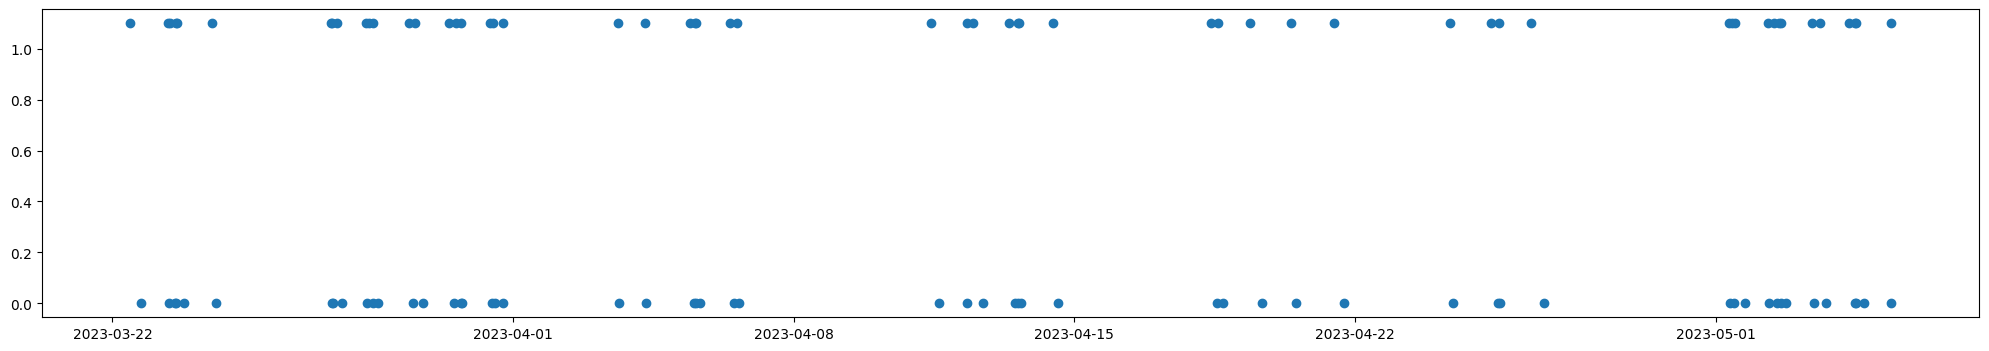

In [70]:
plt.figure(figsize=(25, 4))
plt.scatter(PIr_41.index, PIr_41)

In [71]:
room48pir = pir.index.date
room47pir = PIr_47.index.date
room41pir = PIr_41.index.date


In [72]:
reRoom48 = allignedRoom[allignedRoom.index.duplicated(keep='last') == False].asfreq('1S', method='bfill')


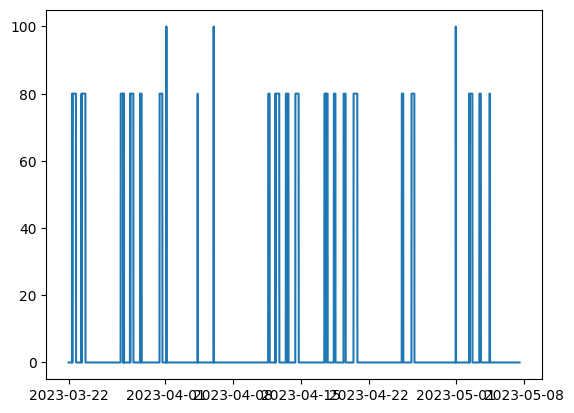

In [73]:
plt.plot(allignedRoom)

In [74]:
reRoom48

value
time                      
2023-03-22 00:20:00      0
2023-03-22 00:20:01      0
2023-03-22 00:20:02      0
2023-03-22 00:20:03      0
2023-03-22 00:20:04      0
...                    ...
2023-05-07 12:20:56      0
2023-05-07 12:20:57      0
2023-05-07 12:20:58      0
2023-05-07 12:20:59      0
2023-05-07 12:21:00      0

[4017661 rows x 1 columns]

In [75]:
reRoom48.index[0]

Timestamp('2023-03-22 00:20:00', freq='S')

In [76]:
reRoom48.index[-1]

Timestamp('2023-05-07 12:21:00', freq='S')

In [77]:
startEnd = pd.DataFrame(data = { 'time': [datetime.datetime(2023, 3, 22, 00, 20), datetime.datetime(2023, 5, 7, 12, 21)],'value' : [0,0] })

In [78]:
startEnd = startEnd.set_index('time')

In [79]:
rePIR_48 = pd.concat([pir, startEnd]).sort_index().asfreq('1S', method='ffill')

rePIR_47 = pd.concat([PIr_47, startEnd]).sort_index().asfreq('1S', method='ffill')
rePIR_47 = rePIR_47.fillna(0)

rePIR_41 = pd.concat([PIr_41, startEnd]).sort_index().asfreq('1S', method='ffill')

In [80]:
# fig, axs = plt.subplots(3, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(rePIR_48)
# axs[0].set_title('PIR/48')
# axs[1].plot(rePIR_47)
# axs[1].set_title('PIR/47')
# axs[2].plot(rePIR_41)
# axs[2].set_title('PIR/41')

In [81]:
# fig, axs = plt.subplots(3, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
# axs[0].plot(rePIR_48['2023-04-01':'2023-04-08'])
# axs[0].set_title('PIR/48')
# axs[1].plot(rePIR_47['2023-04-01':'2023-04-08'])
# axs[1].set_title('PIR/47')
# axs[2].plot(rePIR_41['2023-04-01':'2023-04-08'])
# axs[2].set_title('PIR/41')

In [82]:
result = pd.merge(reRoom48, rePIR_48, left_index=True, right_index=True, suffixes=['_light', '_pir'])
result

value_light  value_pir
time                                       
2023-03-22 00:20:00            0        0.0
2023-03-22 00:20:01            0        0.0
2023-03-22 00:20:02            0        0.0
2023-03-22 00:20:03            0        0.0
2023-03-22 00:20:04            0        0.0
...                          ...        ...
2023-05-07 12:20:56            0        0.0
2023-05-07 12:20:57            0        0.0
2023-05-07 12:20:58            0        0.0
2023-05-07 12:20:59            0        0.0
2023-05-07 12:21:00            0        0.0

[4017661 rows x 2 columns]

In [83]:
reRoom48.describe()

value
count  4.017661e+06
mean   8.595748e+00
std    2.477866e+01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+02

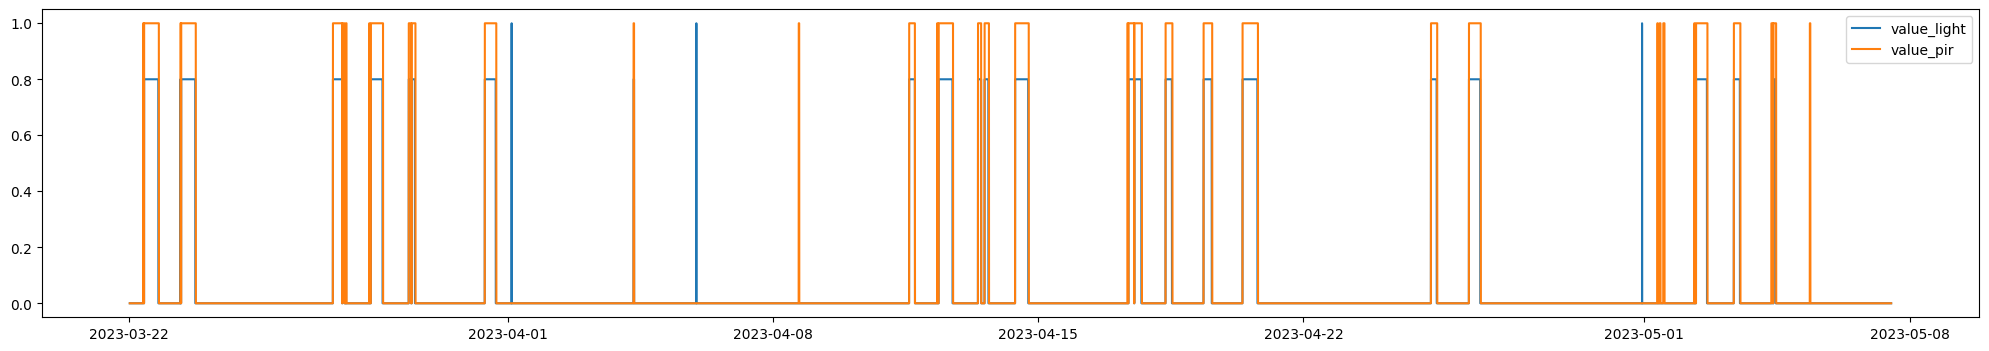

In [84]:
result2=(result-result.min())/(result.max()-result.min())
plt.figure(figsize = (25,4))
plt.plot(result2)
plt.legend(['value_light', 'value_pir'])


Text(0.5, 1.0, 'PIR/48')

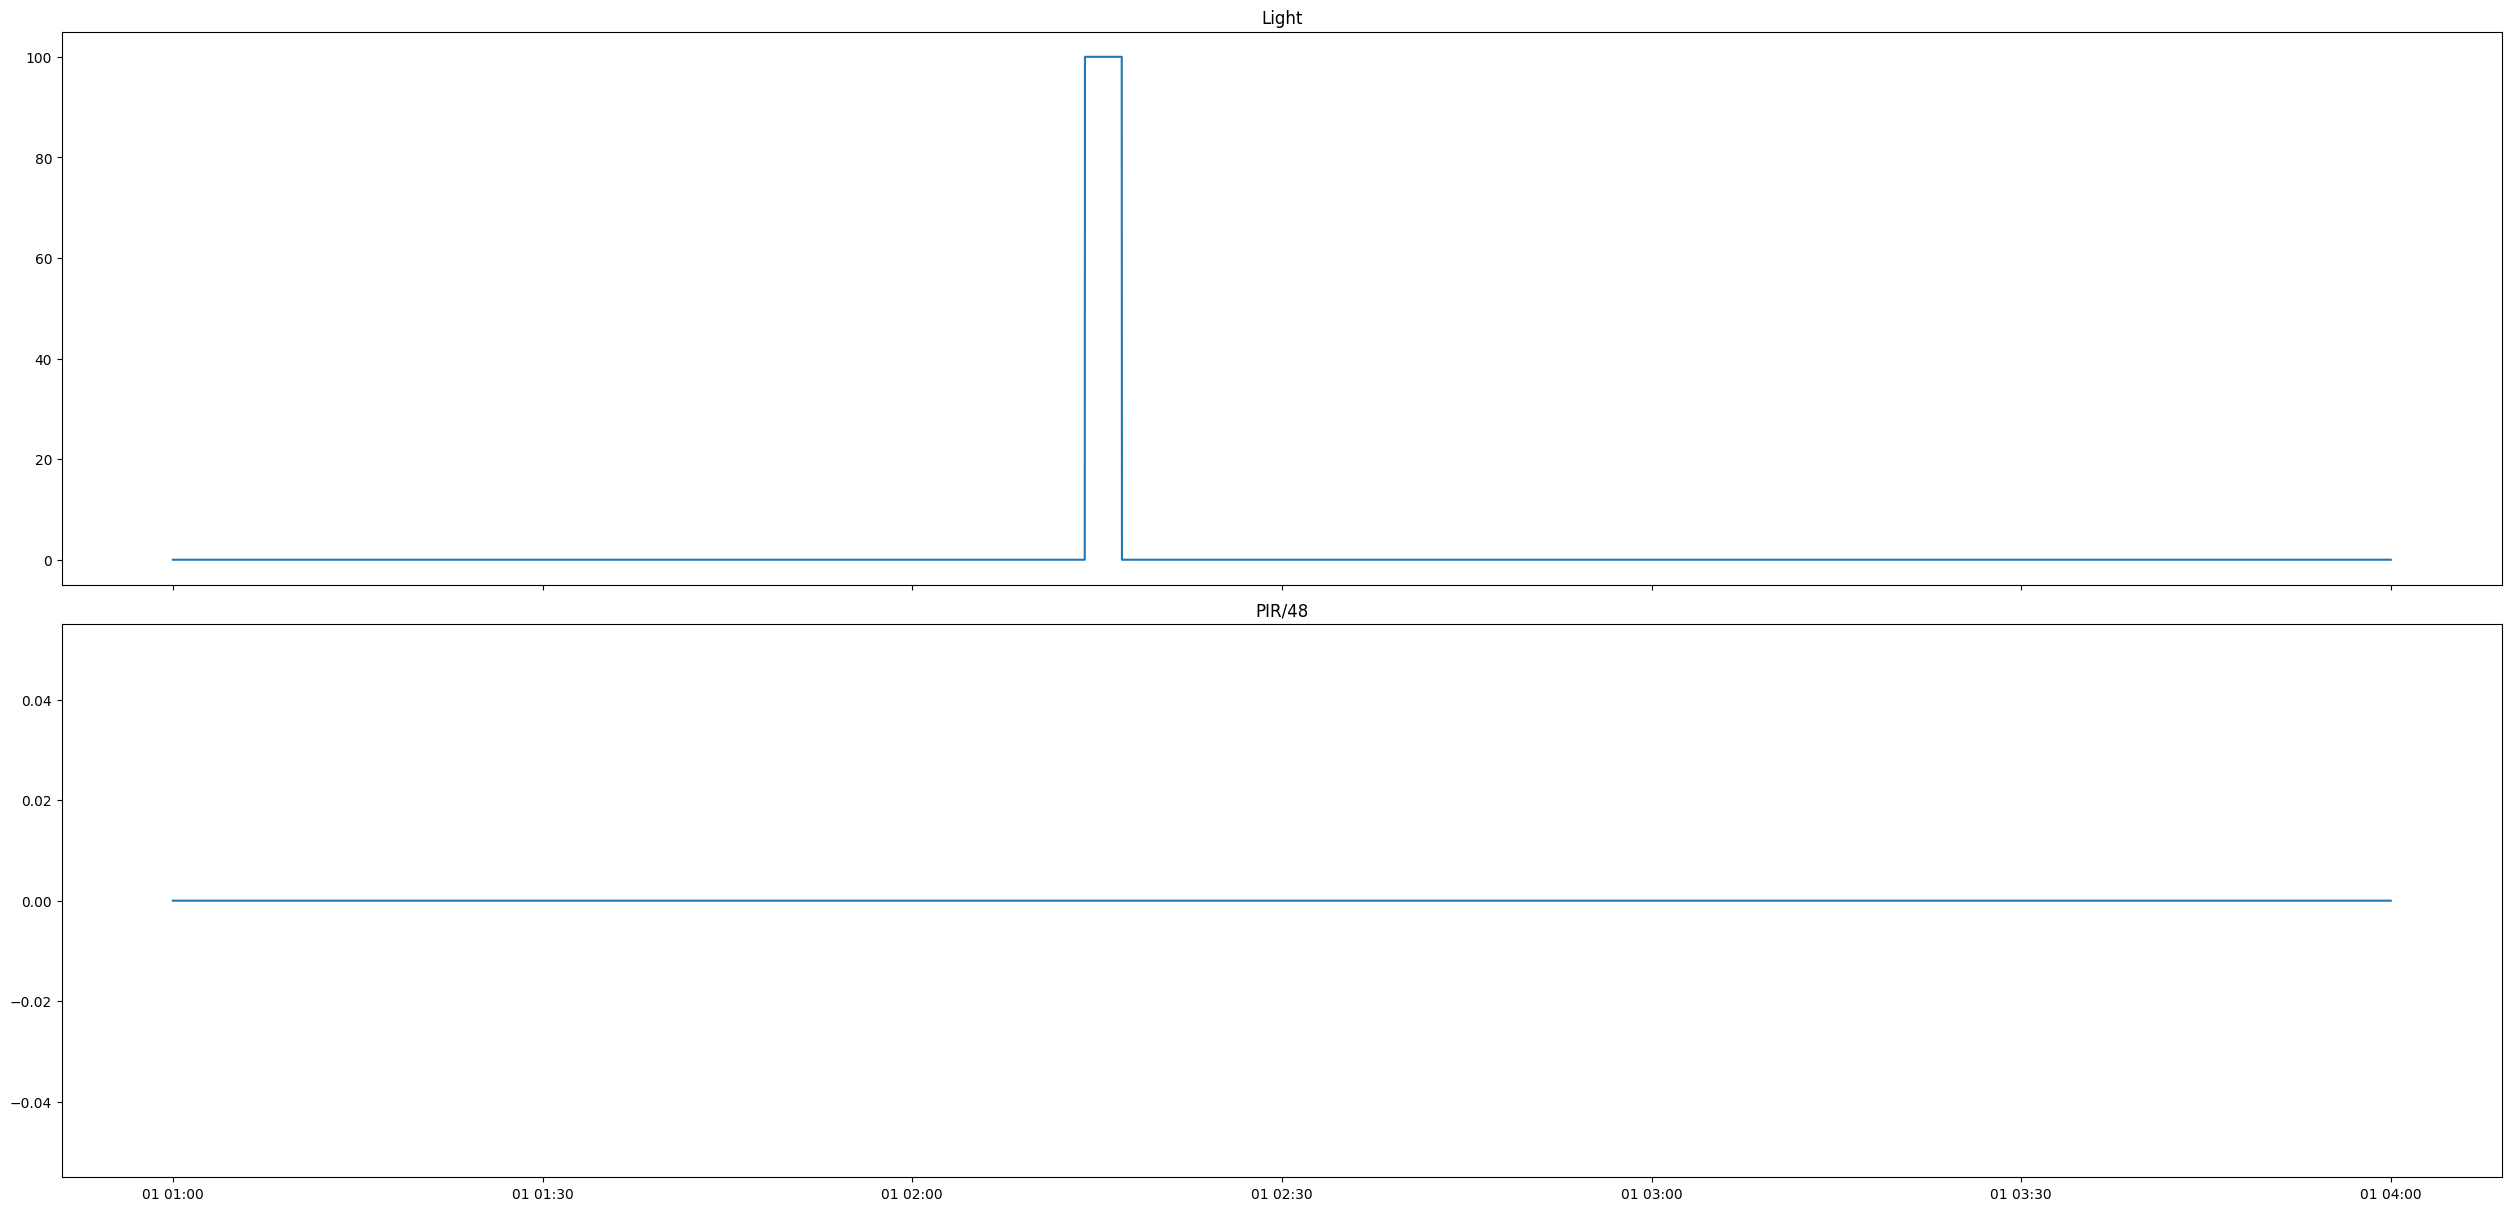

In [85]:
fig, axs = plt.subplots(2, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(reRoom48['2023-04-01 01':'2023-04-01 03'])
axs[0].set_title('Light')
axs[1].plot(rePIR_48['2023-04-01 01':'2023-04-01 03'])
axs[1].set_title('PIR/48')

In [86]:
fig, axs = plt.subplots(2, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(reRoom48['2023-04-01':'2023-04-15'])
axs[0].set_title('Light')
axs[1].plot(rePIR_48['2023-04-01':'2023-04-15'])
axs[1].set_title('PIR/48')
plt.close()

In [87]:
#since there is no problem if PIR = 1 and light = 0 we want to see when the opposite where PIR = 0 and light > 0
len(result[(result['value_light'] > 0) & (result['value_pir'] == 0)])

1166

In [88]:
corr = result['value_light'].corr(result['value_pir'])
corr

0.9523661034246939

In [89]:
reNorth = nortH[nortH.index.duplicated(keep='last') == False].asfreq('1S')
reNorth = reNorth.interpolate(method='linear')

In [90]:
result3 = pd.merge(result, reNorth, left_index=True, right_index=True, suffixes=['_sunlight', ''])
result3

value_light  value_pir     value
time                                                 
2023-03-22 00:20:00            0        0.0      0.00
2023-03-22 00:20:01            0        0.0      0.00
2023-03-22 00:20:02            0        0.0      0.00
2023-03-22 00:20:03            0        0.0      0.00
2023-03-22 00:20:04            0        0.0      0.00
...                          ...        ...       ...
2023-05-07 12:20:56            0        0.0  22303.32
2023-05-07 12:20:57            0        0.0  22305.04
2023-05-07 12:20:58            0        0.0  22306.76
2023-05-07 12:20:59            0        0.0  22308.48
2023-05-07 12:21:00            0        0.0  22310.20

[4017661 rows x 3 columns]

In [91]:
result3.corr()

value_light  value_pir     value
value_light     1.000000   0.952366  0.354812
value_pir       0.952366   1.000000  0.373847
value           0.354812   0.373847  1.000000

In [92]:
reShade = allignedDay[allignedDay.index.duplicated(keep='last') == False].asfreq('1S')
reShade = reShade.interpolate(method='linear')

In [93]:
# plt.figure(figsize = (25,4))
# plt.plot(reShade)

In [94]:
fig, axs = plt.subplots(2, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(reShade)
axs[0].set_title('Shade')
axs[1].plot(rePIR_48)
axs[1].set_title('PIR/48')

plt.close()

In [95]:
result4 = pd.merge(result3, reShade, left_index=True, right_index=True, suffixes=['_sunlight', ''])
result4

value_light  value_pir  value_sunlight  value
time                                                              
2023-03-22 00:20:00            0        0.0            0.00    0.0
2023-03-22 00:20:01            0        0.0            0.00    0.0
2023-03-22 00:20:02            0        0.0            0.00    0.0
2023-03-22 00:20:03            0        0.0            0.00    0.0
2023-03-22 00:20:04            0        0.0            0.00    0.0
...                          ...        ...             ...    ...
2023-05-07 12:20:56            0        0.0        22303.32    0.0
2023-05-07 12:20:57            0        0.0        22305.04    0.0
2023-05-07 12:20:58            0        0.0        22306.76    0.0
2023-05-07 12:20:59            0        0.0        22308.48    0.0
2023-05-07 12:21:00            0        0.0        22310.20    0.0

[4017661 rows x 4 columns]

In [96]:
normRes = (result4-result4.min())/(result4.max()-result4.min())

In [97]:
import seaborn as sns

In [98]:
# sns.set_theme()
# sns.set(rc={"figure.figsize":(25, 4)}) 
# sns.lineplot(data=normRes, palette="dark", linewidth=2.5, alpha= 0.5)

In [99]:
crr2 = result4['2023-04-10':'2023-04-15'].corr()

In [100]:
# sns.heatmap(crr2, annot=True, linewidth=.5)

In [101]:
crr3 = result4['2023-04-14'].corr()

<ipython-input-101-79c7232c64f2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  crr3 = result4['2023-04-14'].corr()


In [102]:
# sns.heatmap(crr, annot=True, linewidth=.5)

In [103]:
from statsmodels.tsa.stattools import ccf

In [104]:
cout = 0
for col in result4.columns:
  for y in  result4.columns:
    if col != y:
      print(col + " " + y)
      print(ccf(result4[col], result4[y]))


value_light value_pir
[0.9523661  0.95229867 0.95223123 ... 0.12593838 0.12593838 0.12593838]
value_light value_sunlight
[0.35481241 0.35480304 0.35479368 ... 0.2767146  0.2767146  0.2767146 ]
value_light value
[0.8120246  0.81194431 0.81186409 ... 0.09799287 0.09799287 0.09799287]
value_pir value_light
[0.9523661  0.95242894 0.95248927 ... 0.12593838 0.12593838 0.12593838]
value_pir value_sunlight
[0.37384694 0.37383772 0.3738285  ... 0.28958663 0.28958663 0.28958663]
value_pir value
[0.77566059 0.77568385 0.77570562 ... 0.10255124 0.10255124 0.10255124]
value_sunlight value_light
[ 0.35481241  0.35482206  0.35483172 ... -0.7322955  -0.7323344
 -0.7323733 ]
value_sunlight value_pir
[ 0.37384694  0.37385647  0.37386599 ... -0.76635997 -0.76640067
 -0.76644138]
value_sunlight value
[ 0.30277264  0.3027733   0.30277399 ... -0.59630601 -0.59633768
 -0.59636935]
value value_light
[0.8120246  0.81210219 0.81217672 ... 0.09799287 0.09799287 0.09799287]
value value_pir
[0.77566059 0.77563611 

In [105]:
# normres = (result4-result4.min())/(result4.max()-result4.min())
# normres.to_csv('normRes47.csv')

In [106]:
result4 = result4.rename(columns={"value": "shade"})

In [107]:
crr1 =result4.corr()

[Text(0.5, 1.0, 'Correlation matrix of the sensor data collected at each second')]

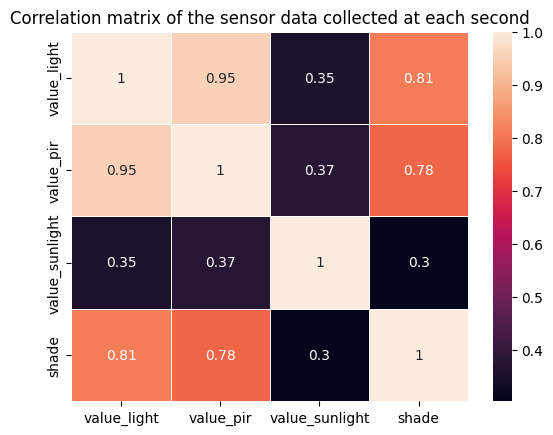

In [137]:
sns.heatmap(crr1, annot=True, linewidth=.5).set(title='Correlation matrix of the sensor data collected at each second')

<Axes: >

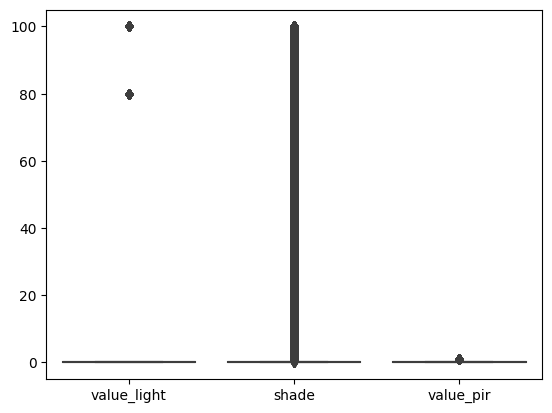

In [110]:
sns.boxplot(result4[['value_light','shade', 'value_pir']])

In [111]:
splits = {}
for month in result4.index.month.unique():
    # Split the data for each month
    month_data = result4[result4.index.month  == month]
    splits[f'month_{month}'] = month_data

In [112]:
r48month3norm = (splits['month_3']-splits['month_3'].min())/(splits['month_3'].max()-splits['month_3'].min())
r48month4norm = (splits['month_4']-splits['month_4'].min())/(splits['month_4'].max()-splits['month_4'].min())
r48month5norm = (splits['month_5']-splits['month_5'].min())/(splits['month_5'].max()-splits['month_5'].min())

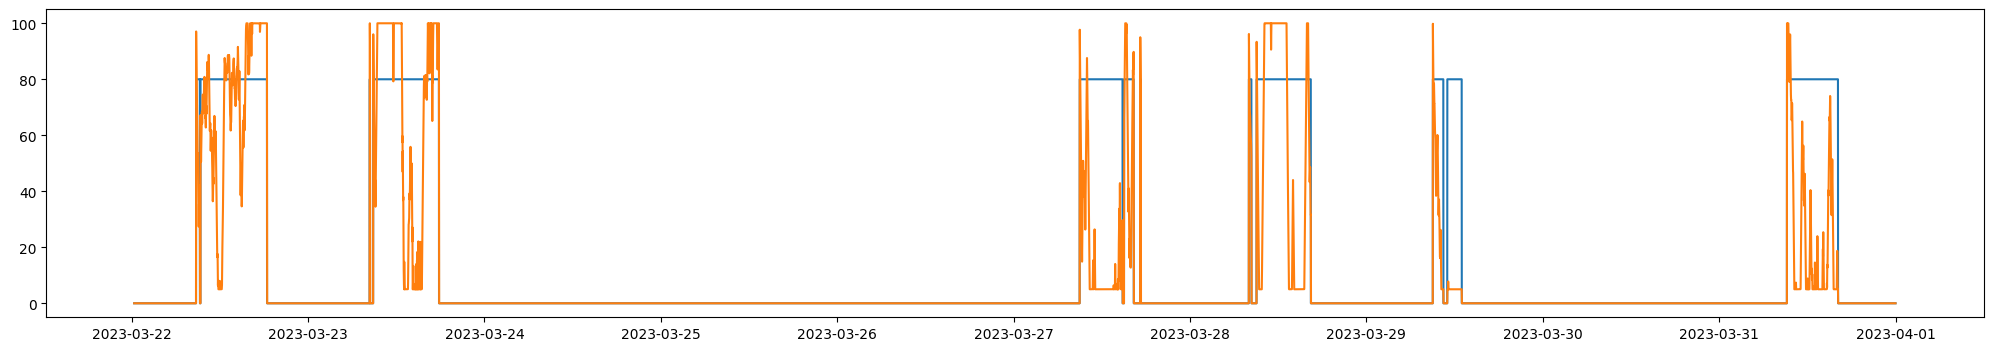

In [113]:
plt.figure(figsize=(25, 4))
plt.plot(splits['month_3'][['value_light','shade']])

Text(0.5, 1.0, 'March')

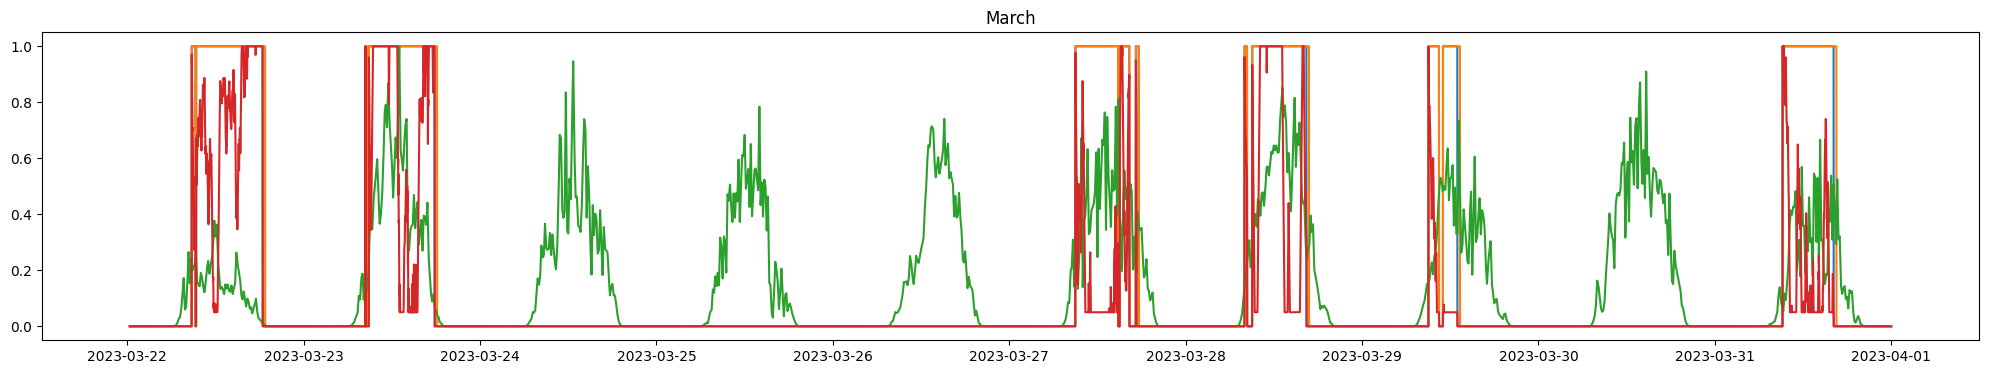

In [114]:
plt.figure(figsize=(25, 4))
plt.plot(r48month3norm)
plt.title('March')

Text(0.5, 1.0, 'sun light/shade')

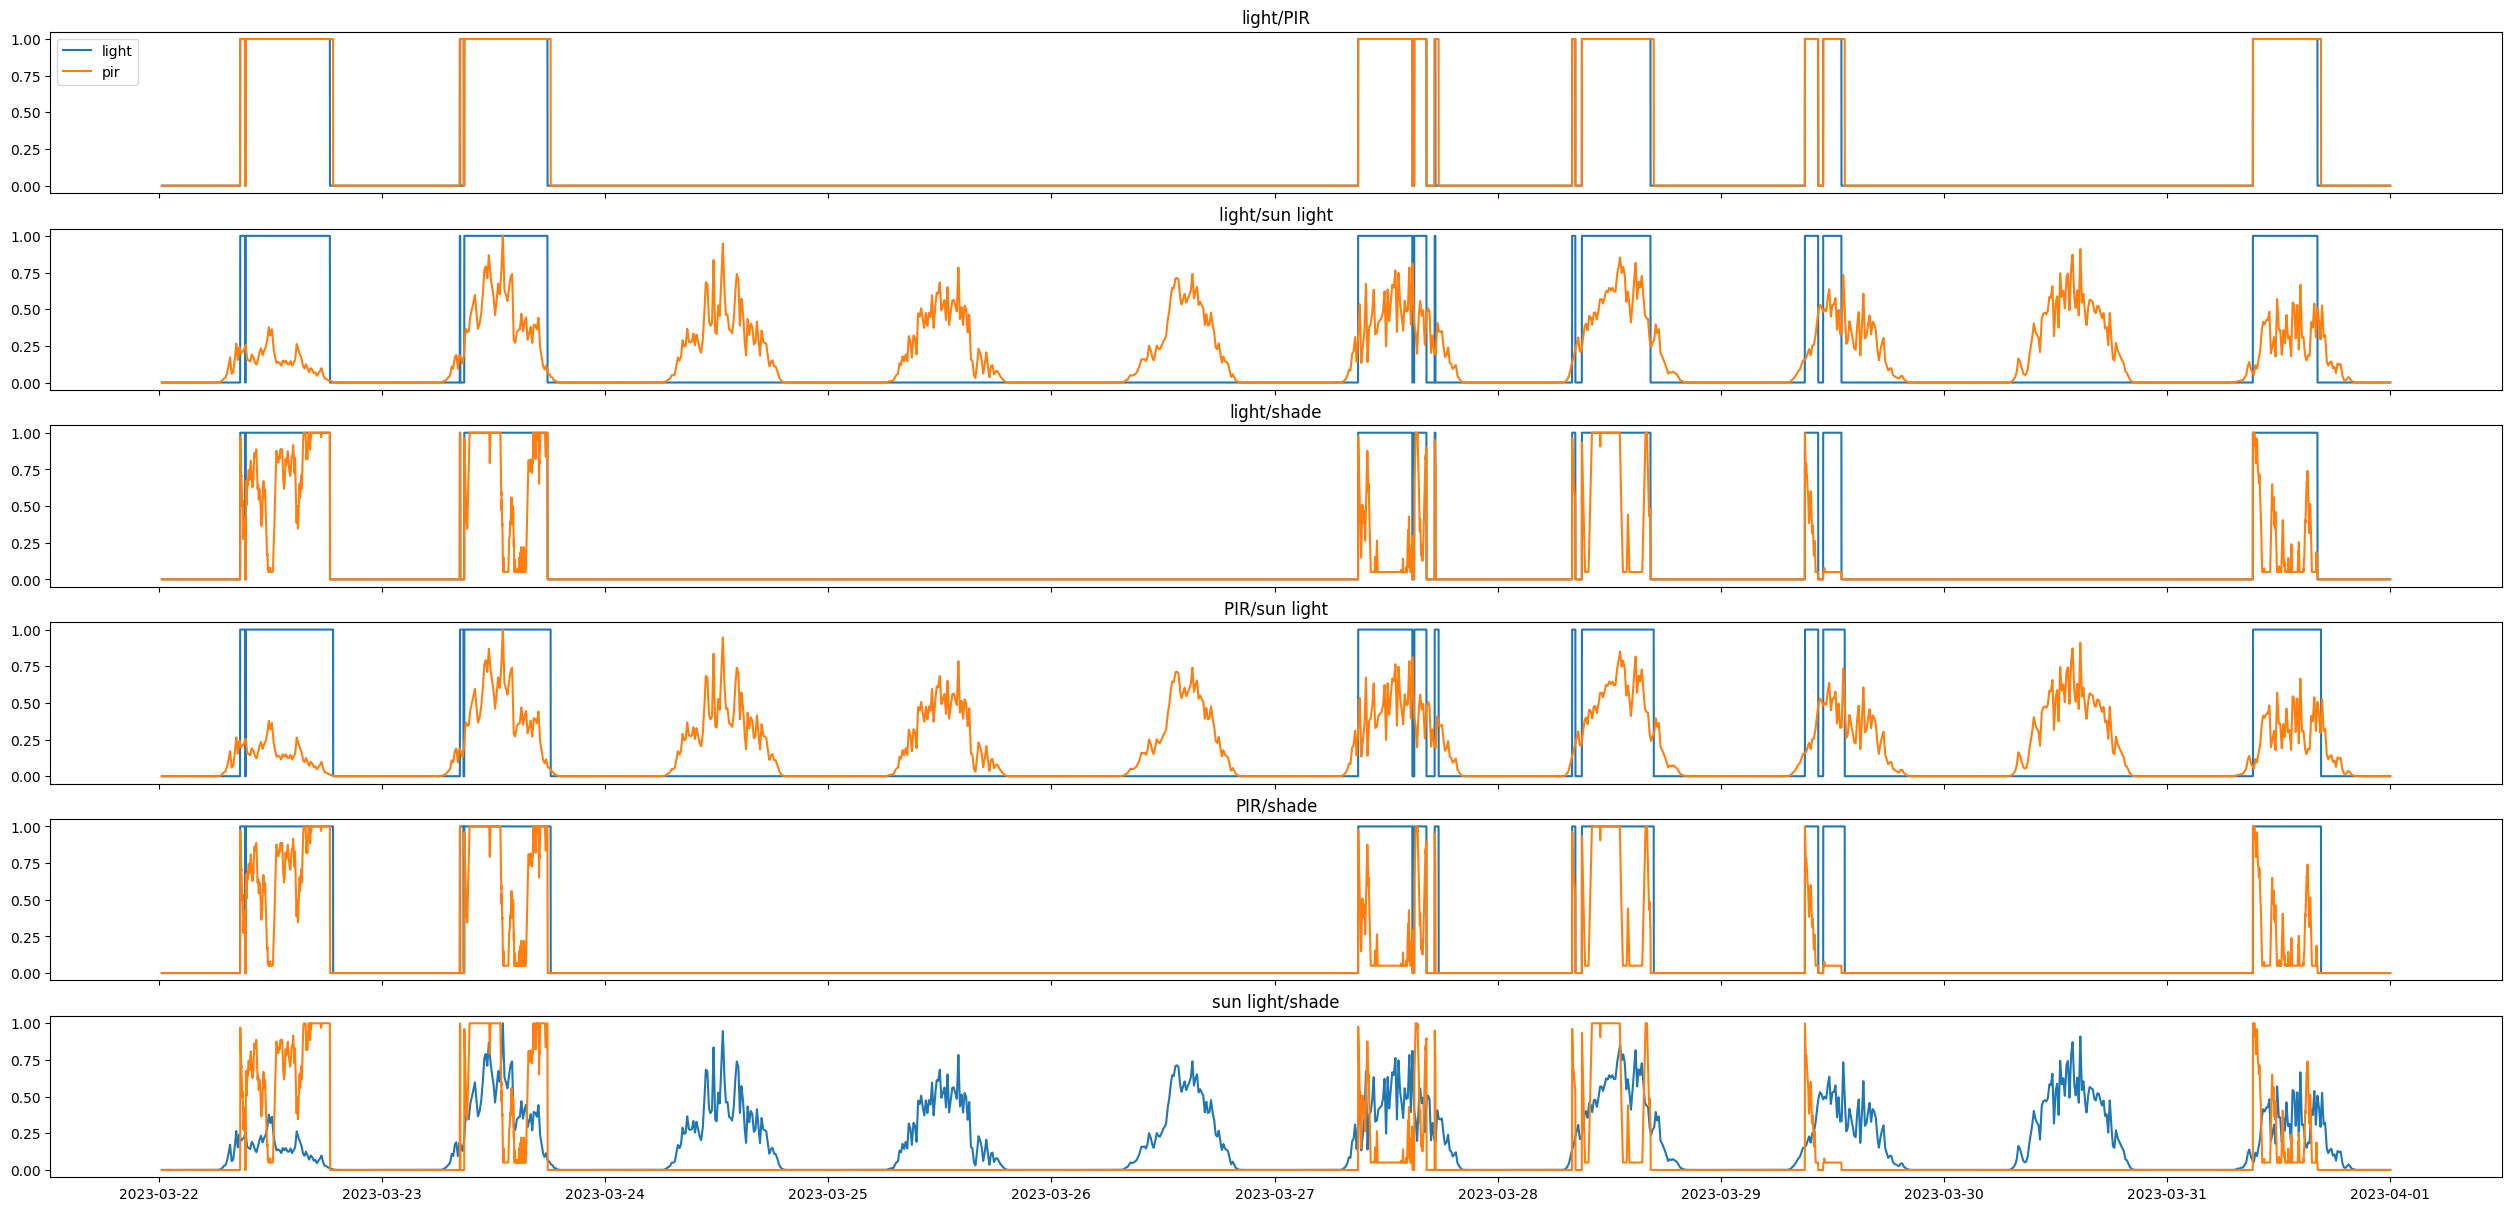

In [115]:
# value_light  value_pir  value_sunlight  shade
fig, axs = plt.subplots(6, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(r48month3norm[['value_light','value_pir']])
axs[0].set_title('light/PIR')
axs[0].legend(['light', 'pir'],loc="upper left")

axs[1].plot(r48month3norm[['value_light','value_sunlight']])
axs[1].set_title('light/sun light')

axs[2].plot(r48month3norm[['value_light','shade']])
axs[2].set_title('light/shade')

axs[3].plot(r48month3norm[['value_pir','value_sunlight']])
axs[3].set_title('PIR/sun light')

axs[4].plot(r48month3norm[['value_pir','shade']])
axs[4].set_title('PIR/shade')

axs[5].plot(r48month3norm[['value_sunlight','shade']])
axs[5].set_title('sun light/shade')

Text(0.5, 1.0, 'April')

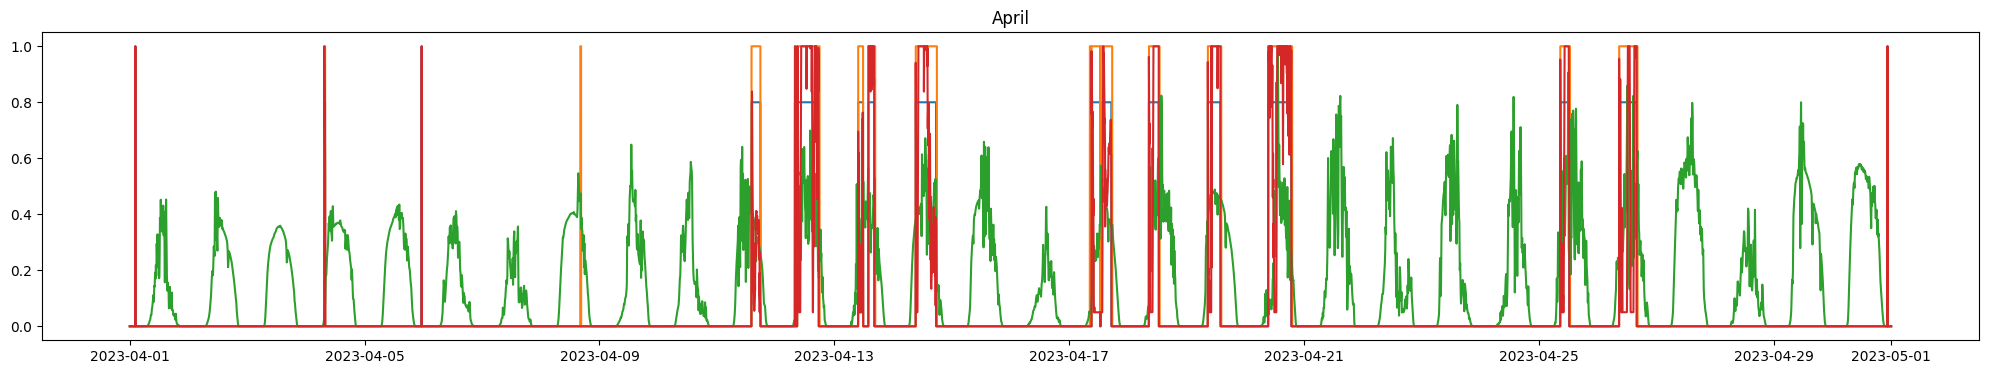

In [116]:
plt.figure(figsize=(25, 4))
plt.plot(r48month4norm)
plt.title('April')

Text(0.5, 1.0, 'sun light/shade/lgiht')

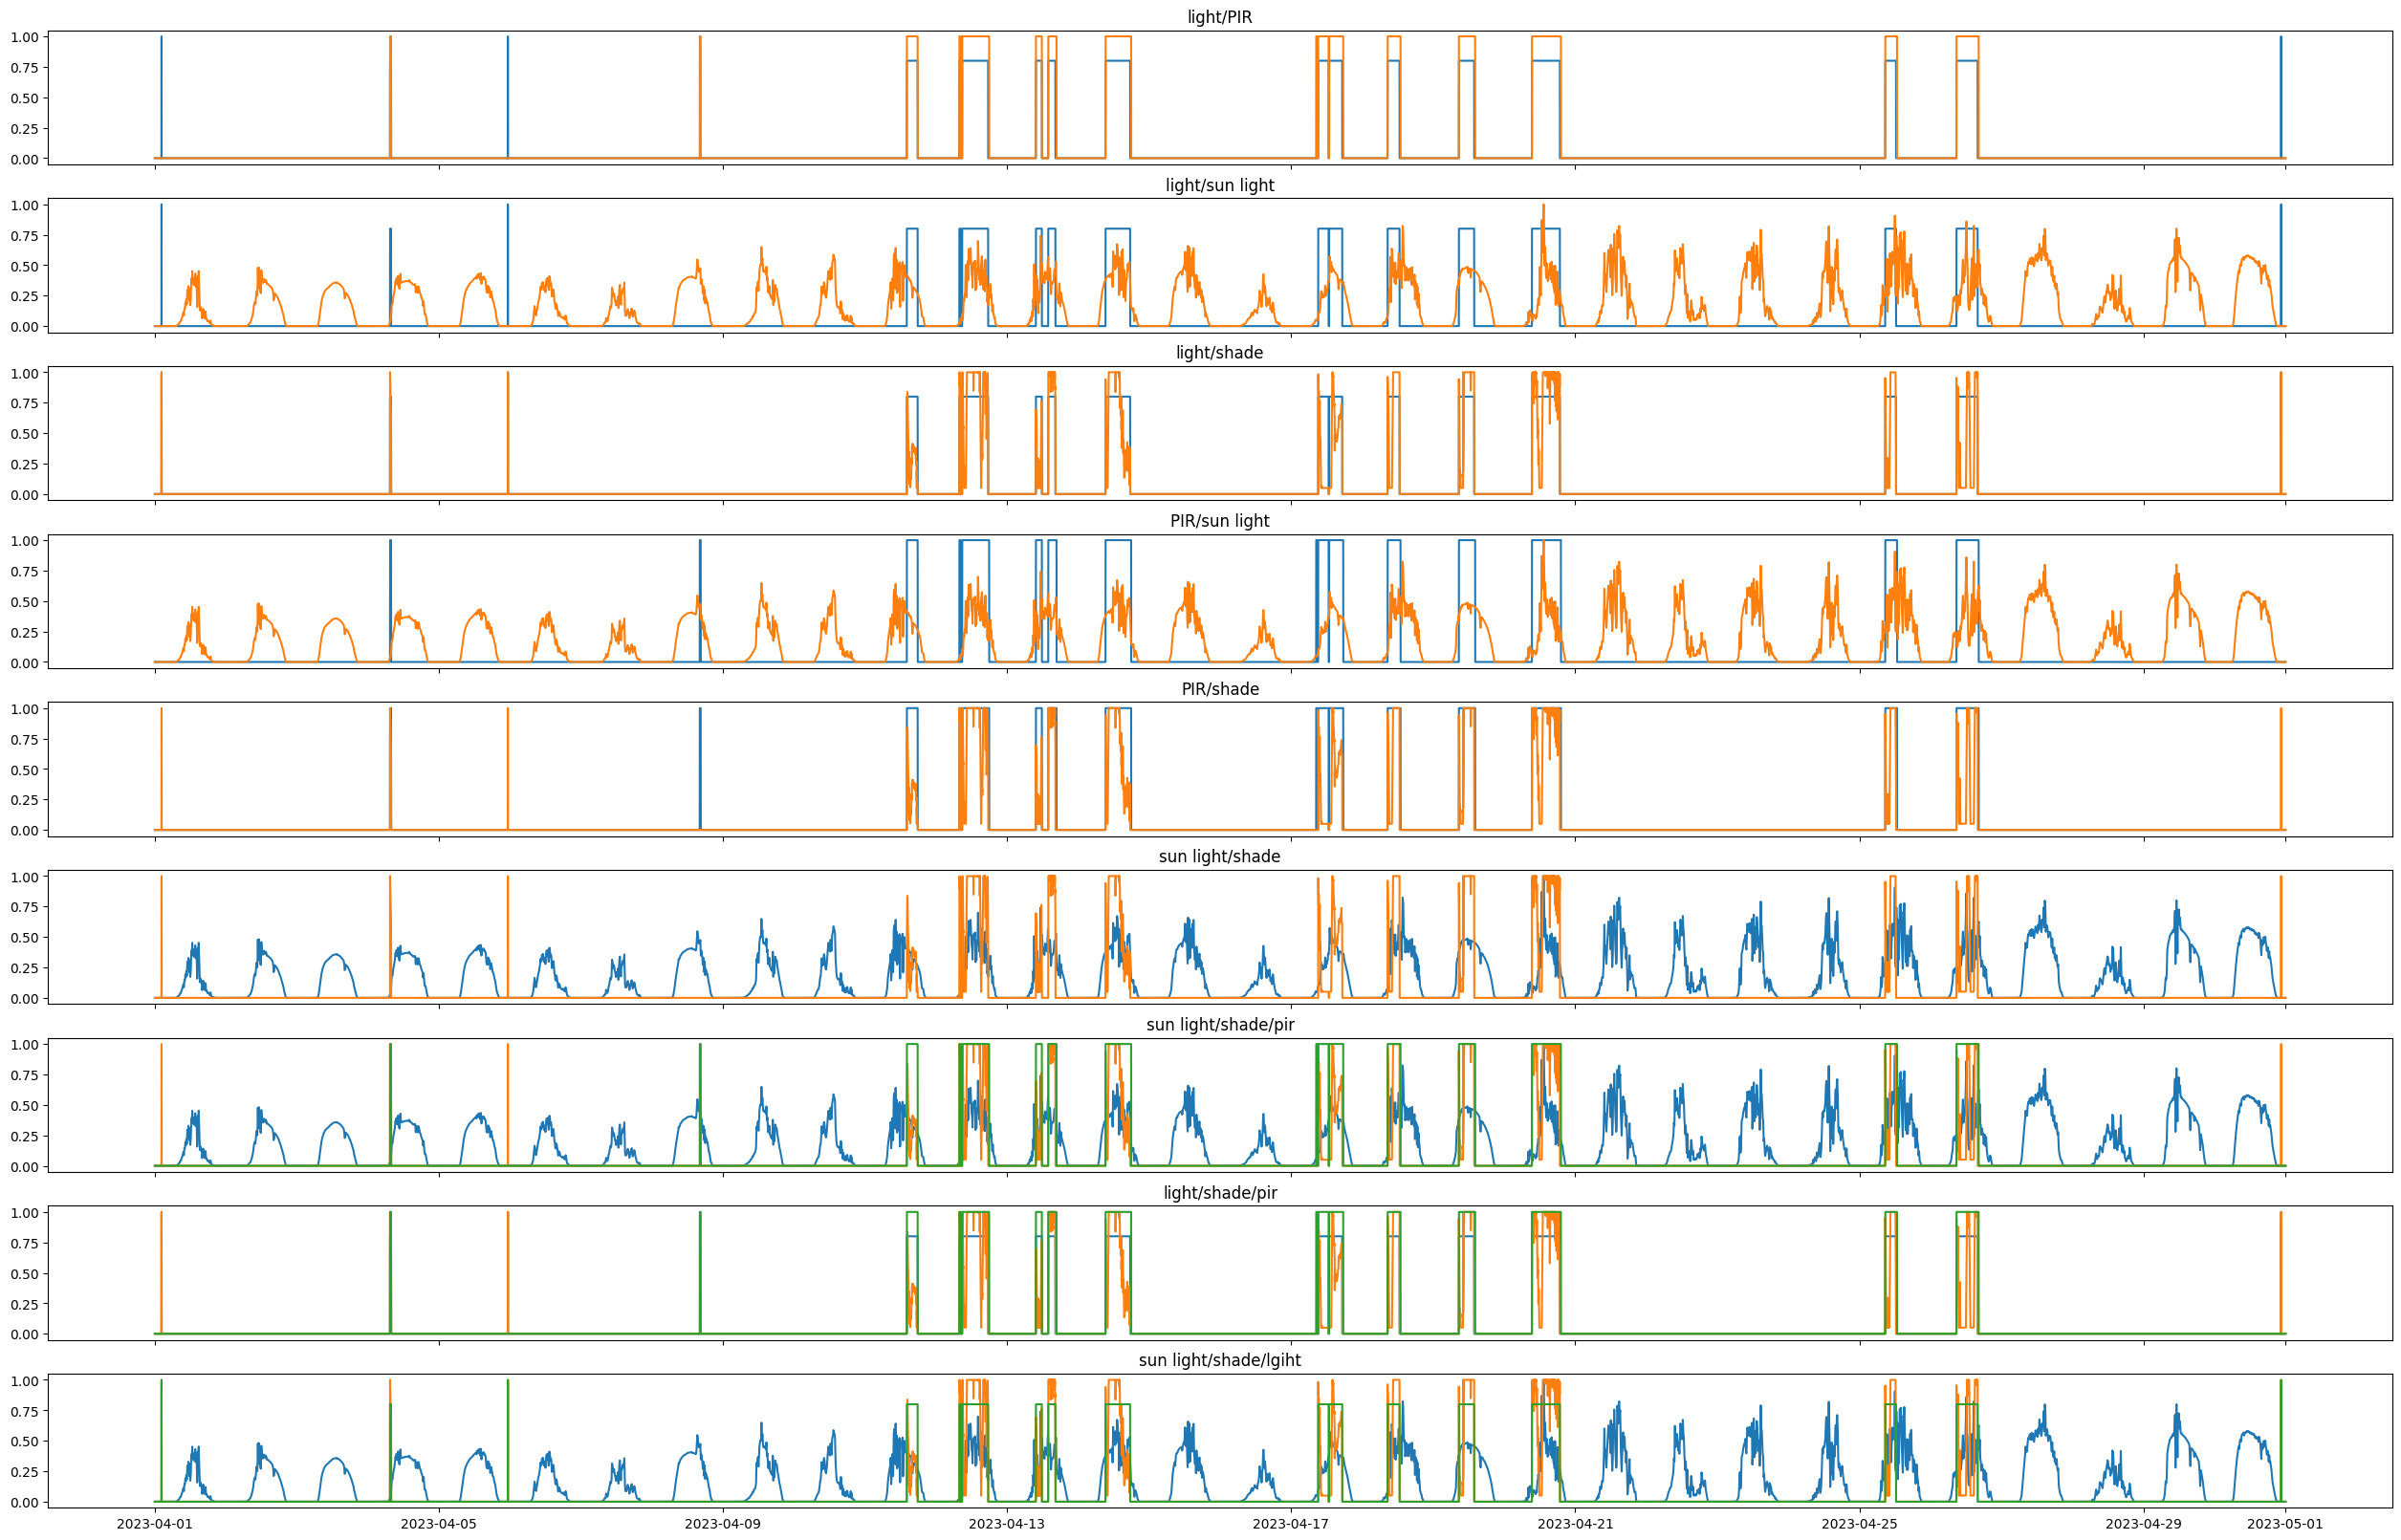

In [117]:
# value_light  value_pir  value_sunlight  shade
fig, axs = plt.subplots(9, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 16))
axs[0].plot(r48month4norm[['value_light','value_pir']])
axs[0].set_title('light/PIR')

axs[1].plot(r48month4norm[['value_light','value_sunlight']])
axs[1].set_title('light/sun light')

axs[2].plot(r48month4norm[['value_light','shade']])
axs[2].set_title('light/shade')

axs[3].plot(r48month4norm[['value_pir','value_sunlight']])
axs[3].set_title('PIR/sun light')

axs[4].plot(r48month4norm[['value_pir','shade']])
axs[4].set_title('PIR/shade')

axs[5].plot(r48month4norm[['value_sunlight','shade']])
axs[5].set_title('sun light/shade')

axs[6].plot(r48month4norm[['value_sunlight','shade', 'value_pir']])
axs[6].set_title('sun light/shade/pir')

axs[7].plot(r48month4norm[['value_light','shade', 'value_pir']])
axs[7].set_title('light/shade/pir')

axs[8].plot(r48month4norm[['value_sunlight','shade', 'value_light']])
axs[8].set_title('sun light/shade/lgiht')

Text(0.5, 1.0, 'May')

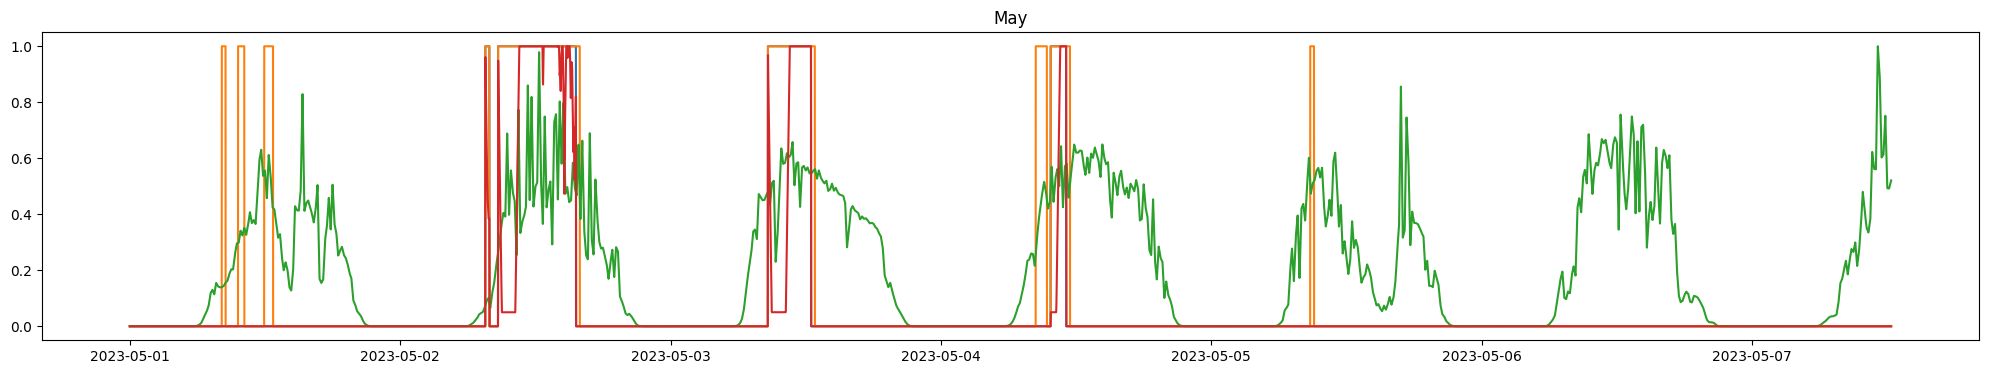

In [118]:
plt.figure(figsize=(25, 4))
plt.plot(r48month5norm)
plt.title('May')

Text(0.5, 1.0, 'sun light/shade')

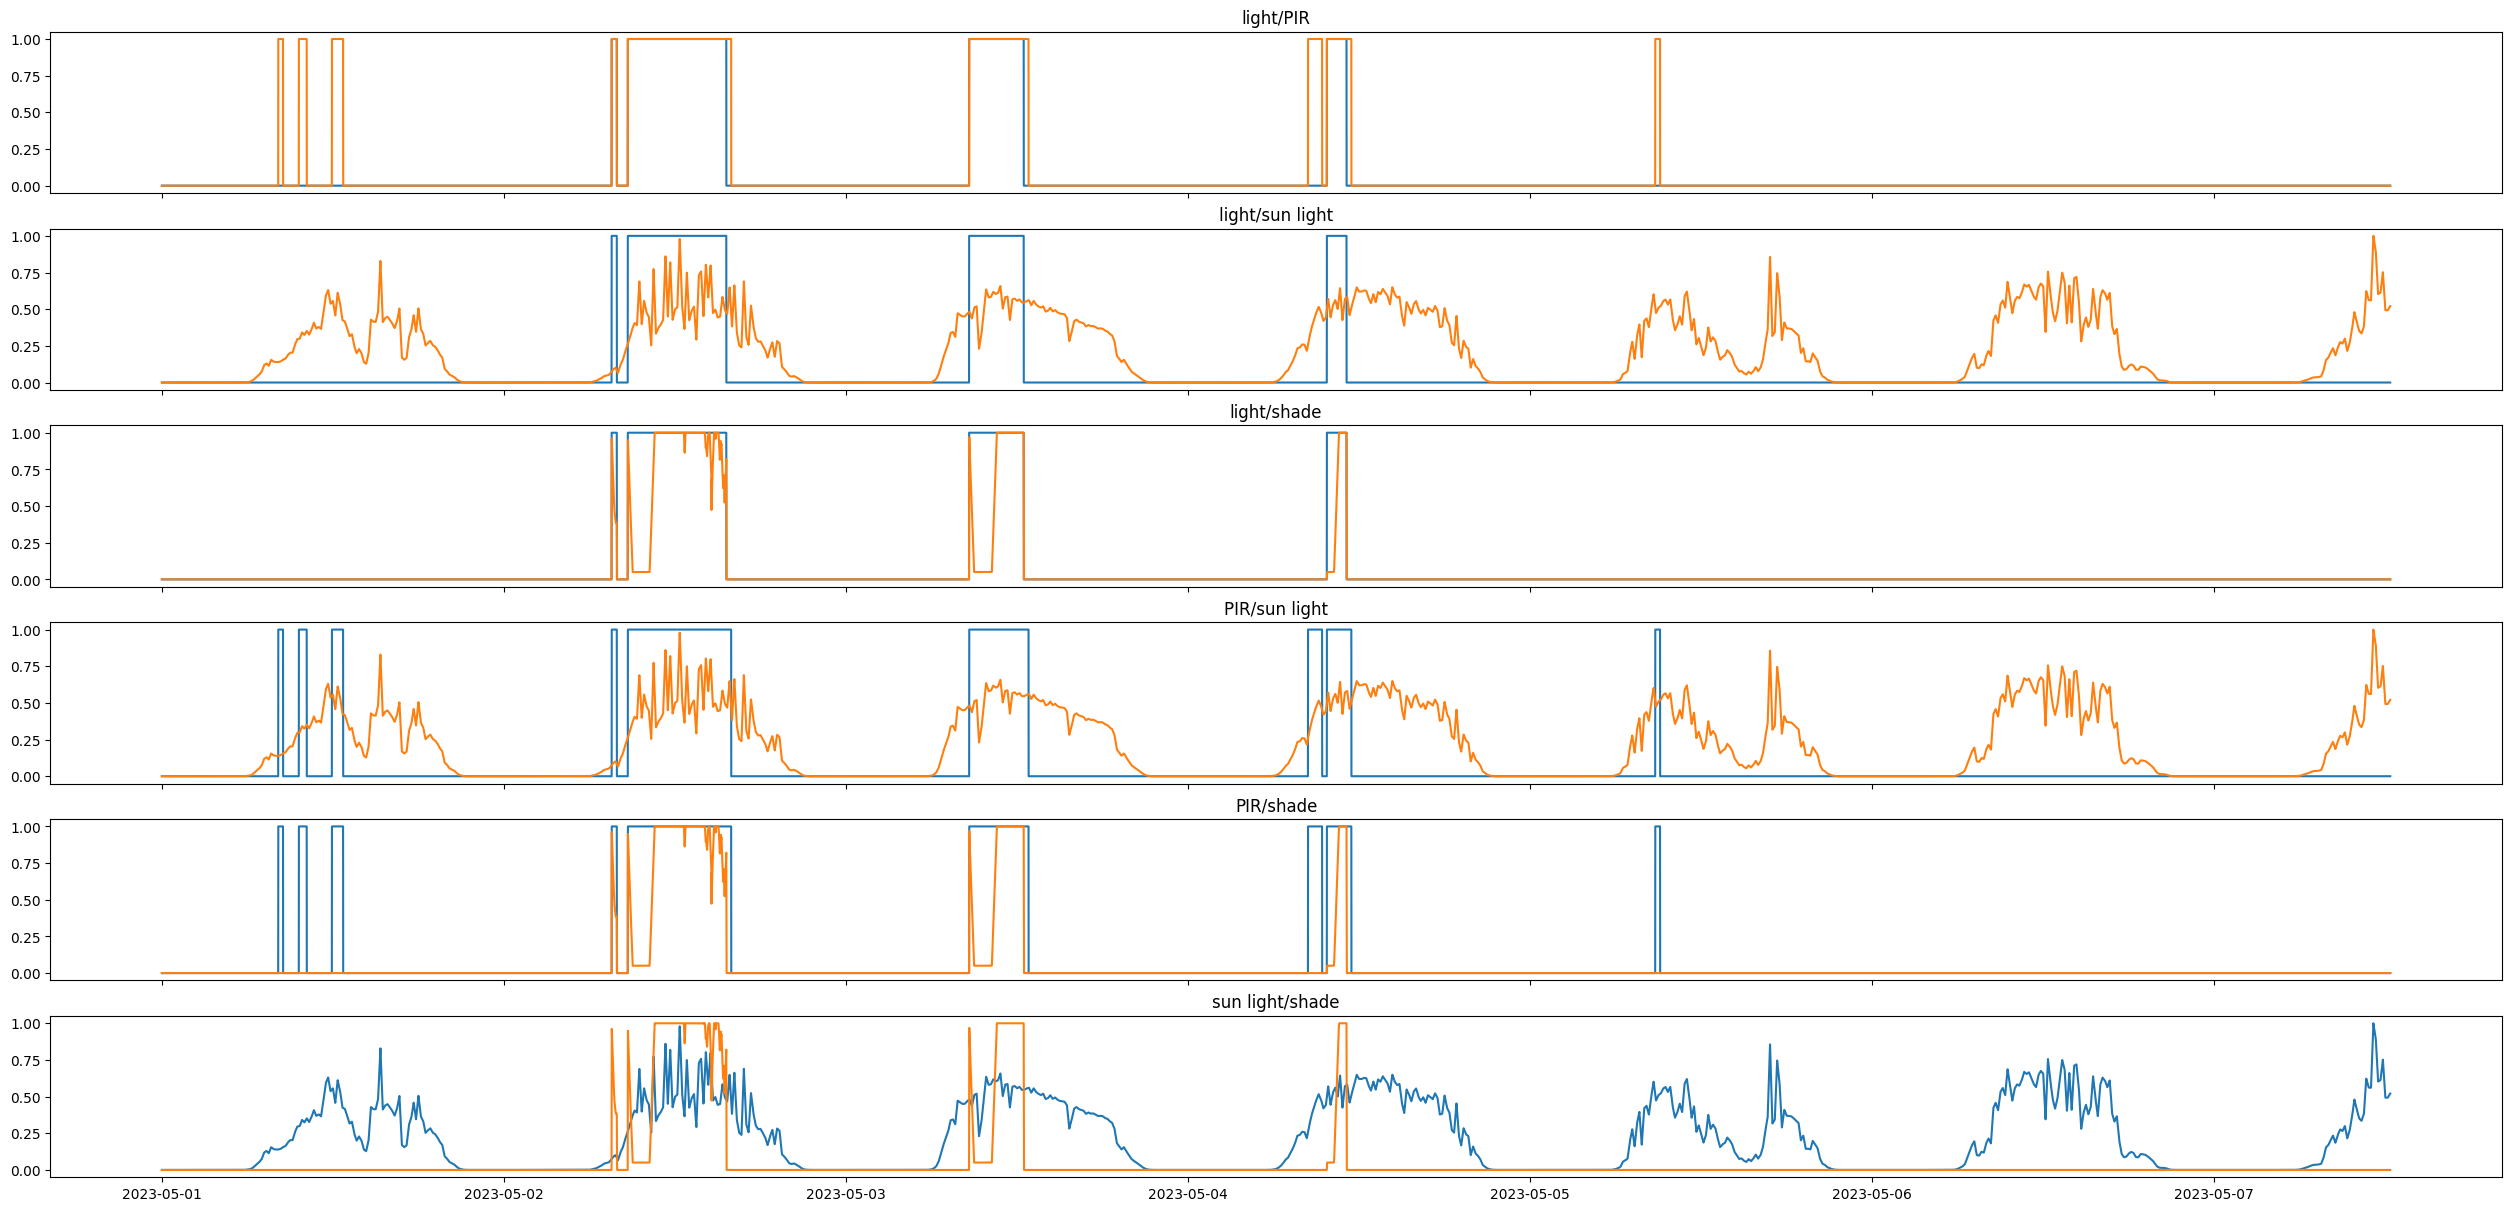

In [119]:
# value_light  value_pir  value_sunlight  shade
fig, axs = plt.subplots(6, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(r48month5norm[['value_light','value_pir']])
axs[0].set_title('light/PIR')

axs[1].plot(r48month5norm[['value_light','value_sunlight']])
axs[1].set_title('light/sun light')

axs[2].plot(r48month5norm[['value_light','shade']])
axs[2].set_title('light/shade')

axs[3].plot(r48month5norm[['value_pir','value_sunlight']])
axs[3].set_title('PIR/sun light')

axs[4].plot(r48month5norm[['value_pir','shade']])
axs[4].set_title('PIR/shade')

axs[5].plot(r48month5norm[['value_sunlight','shade']])
axs[5].set_title('sun light/shade')

In [120]:
result5 = normRes.resample('H').mean()
result5= result5.rename(columns={"value": "shade"})

In [121]:
result5.columns

Index(['value_light', 'value_pir', 'value_sunlight', 'shade'], dtype='object')

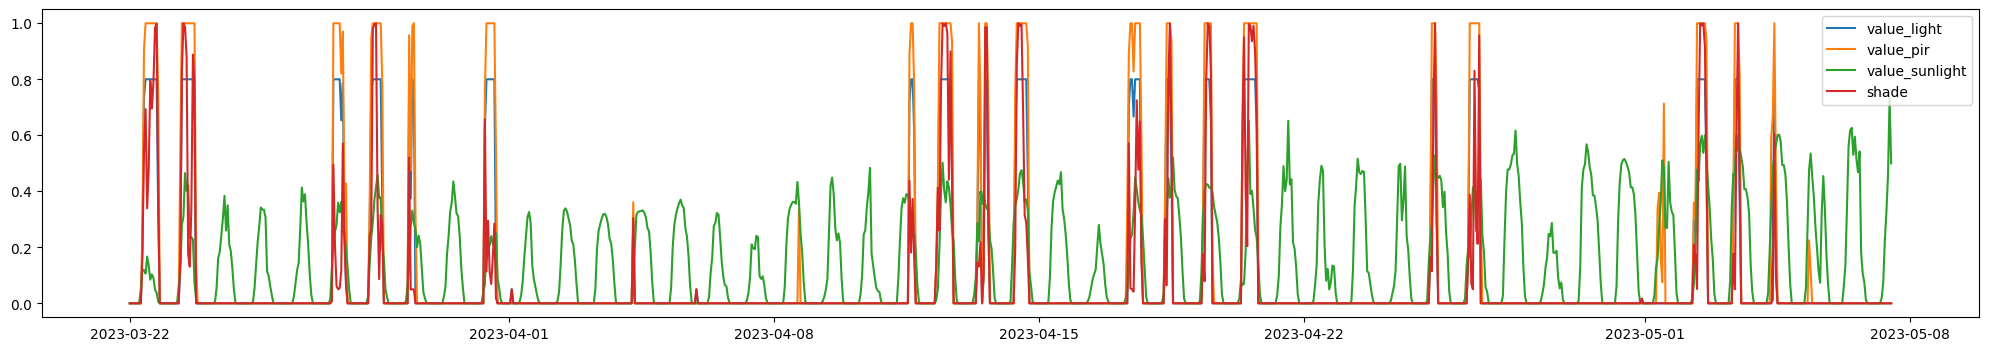

In [122]:
plt.figure(figsize=(25,4))
plt.plot(result5)
plt.legend(result5.columns)

Text(0.5, 1.0, 'sun light/shade/lgiht')

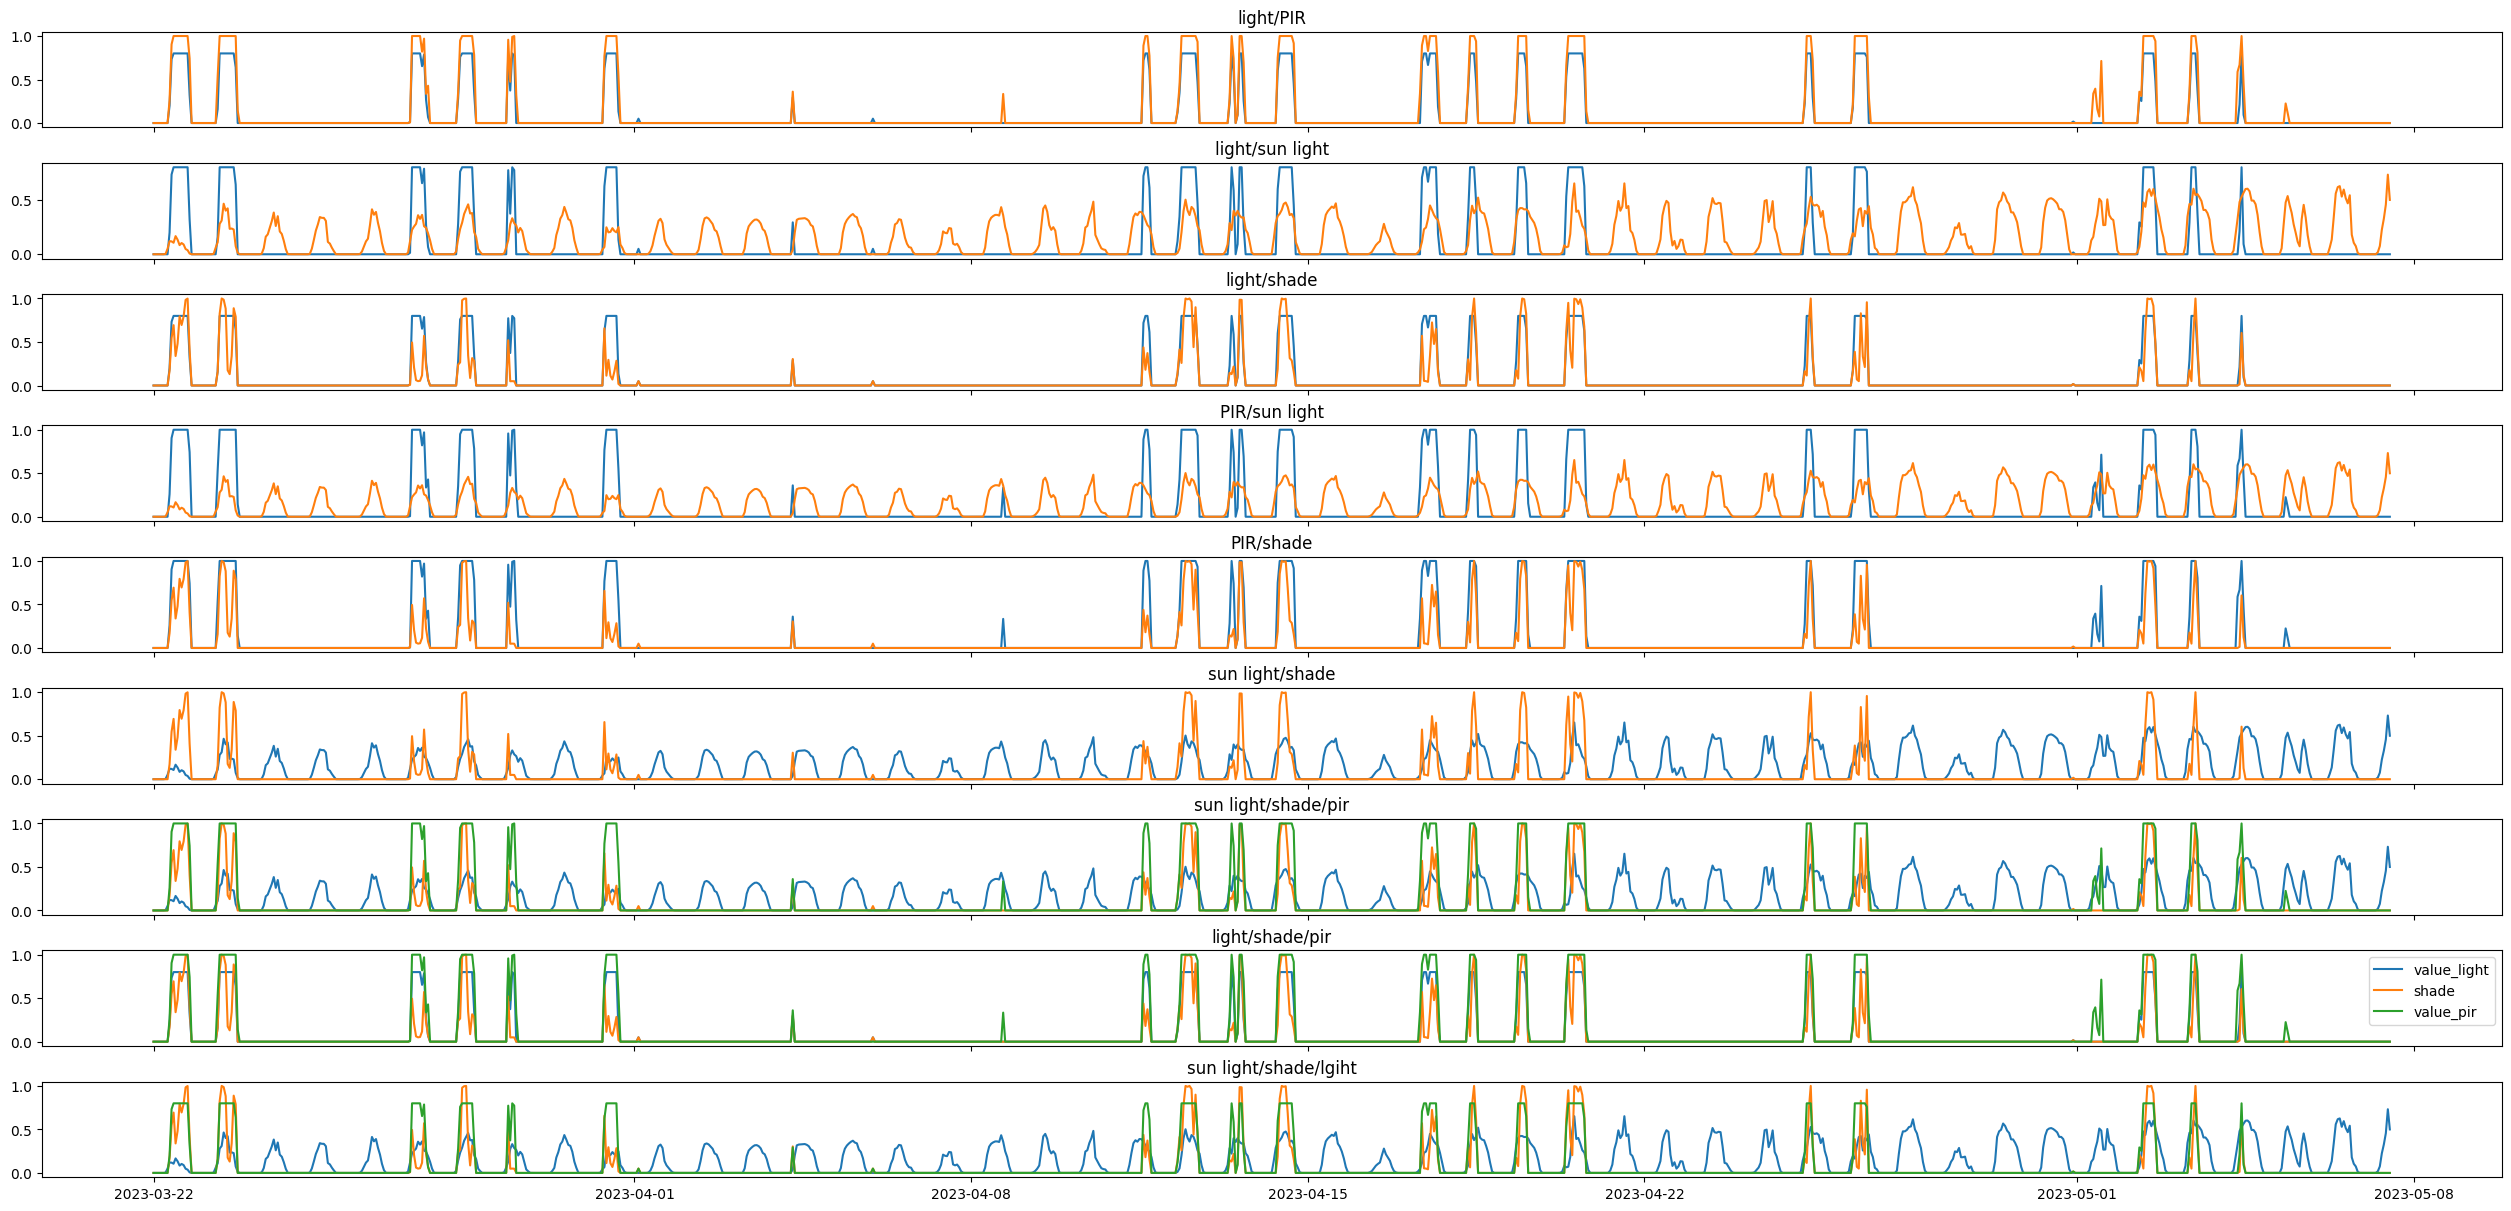

In [123]:
fig, axs = plt.subplots(9, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(result5[['value_light','value_pir']])
axs[0].set_title('light/PIR')

axs[1].plot(result5[['value_light','value_sunlight']])
axs[1].set_title('light/sun light')

axs[2].plot(result5[['value_light','shade']])
axs[2].set_title('light/shade')

axs[3].plot(result5[['value_pir','value_sunlight']])
axs[3].set_title('PIR/sun light')

axs[4].plot(result5[['value_pir','shade']])
axs[4].set_title('PIR/shade')

axs[5].plot(result5[['value_sunlight','shade']])
axs[5].set_title('sun light/shade')

axs[6].plot(result5[['value_sunlight','shade', 'value_pir']])
axs[6].set_title('sun light/shade/pir')

axs[7].plot(result5[['value_light','shade', 'value_pir']])
axs[7].set_title('light/shade/pir')
axs[7].legend(['value_light','shade', 'value_pir'])

axs[8].plot(result5[['value_sunlight','shade', 'value_light']])
axs[8].set_title('sun light/shade/lgiht')

In [124]:
result5.to_csv('dataset_hourlyaverage.csv')

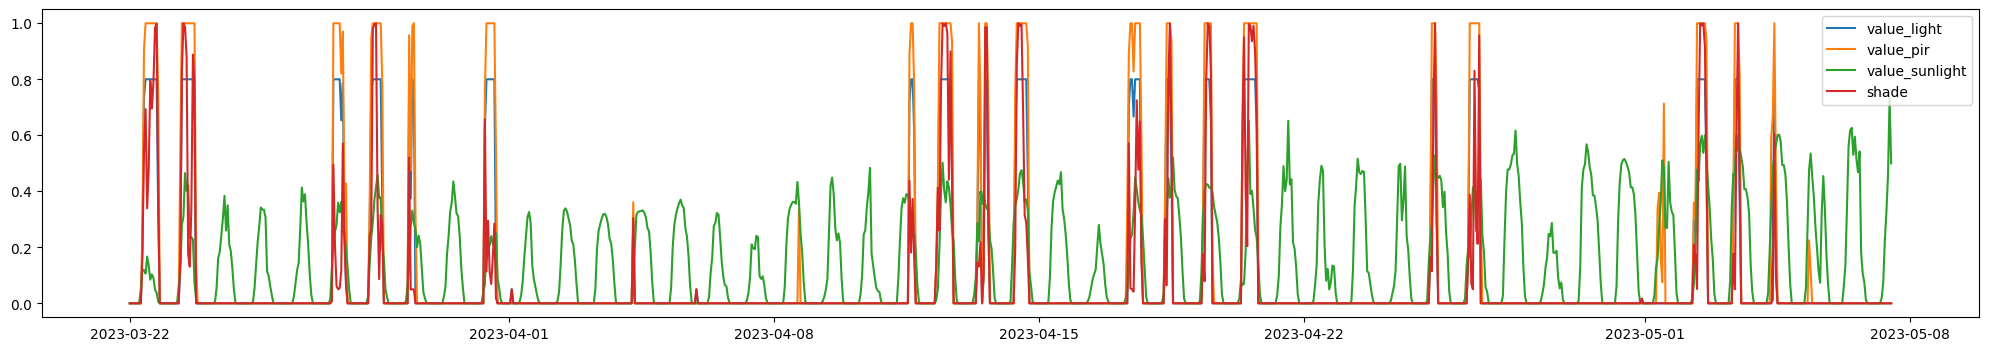

In [134]:
plt.figure(figsize=(25,4))
plt.plot(result5)
plt.legend(result5.columns)

[Text(0.5, 1.0, 'Correlation matrix of the sensor data collected at each hour')]

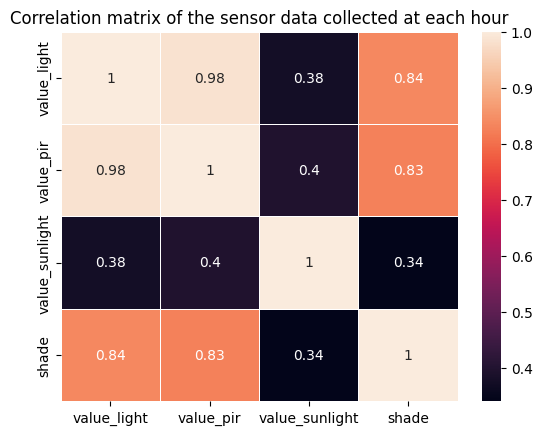

In [138]:
sns.heatmap(result5.corr(), annot=True, linewidth=.5).set(title='Correlation matrix of the sensor data collected at each hour')

<Axes: >

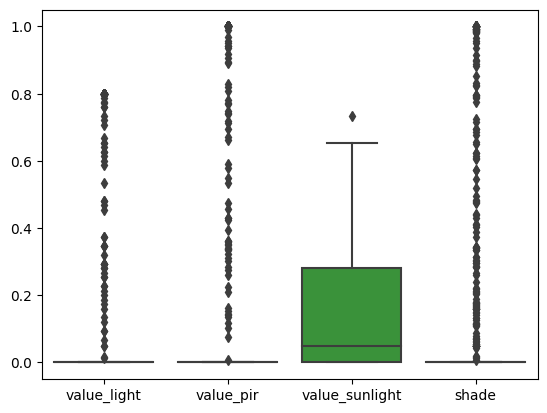

In [133]:
sns.boxplot(result5)

In [127]:
result6 = normRes.resample('D').mean()
result6= result6.rename(columns={"value": "shade"})

In [128]:
result6.columns

Index(['value_light', 'value_pir', 'value_sunlight', 'shade'], dtype='object')

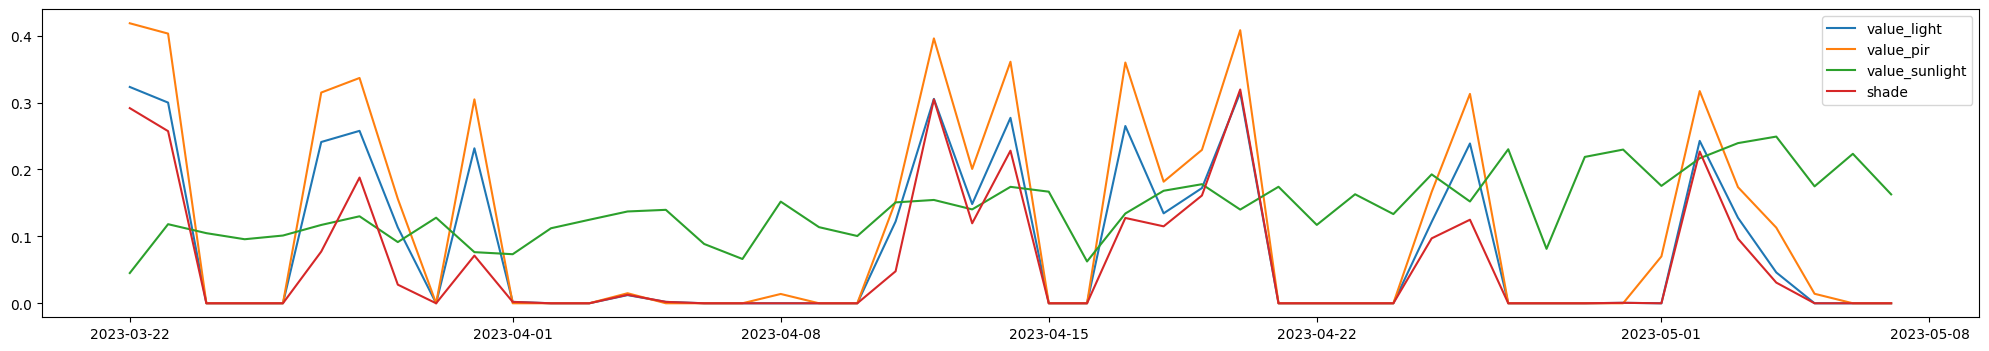

In [129]:
plt.figure(figsize=(25,4))
plt.plot(result6)
plt.legend(result6.columns)

Text(0.5, 1.0, 'sun light/shade/lgiht')

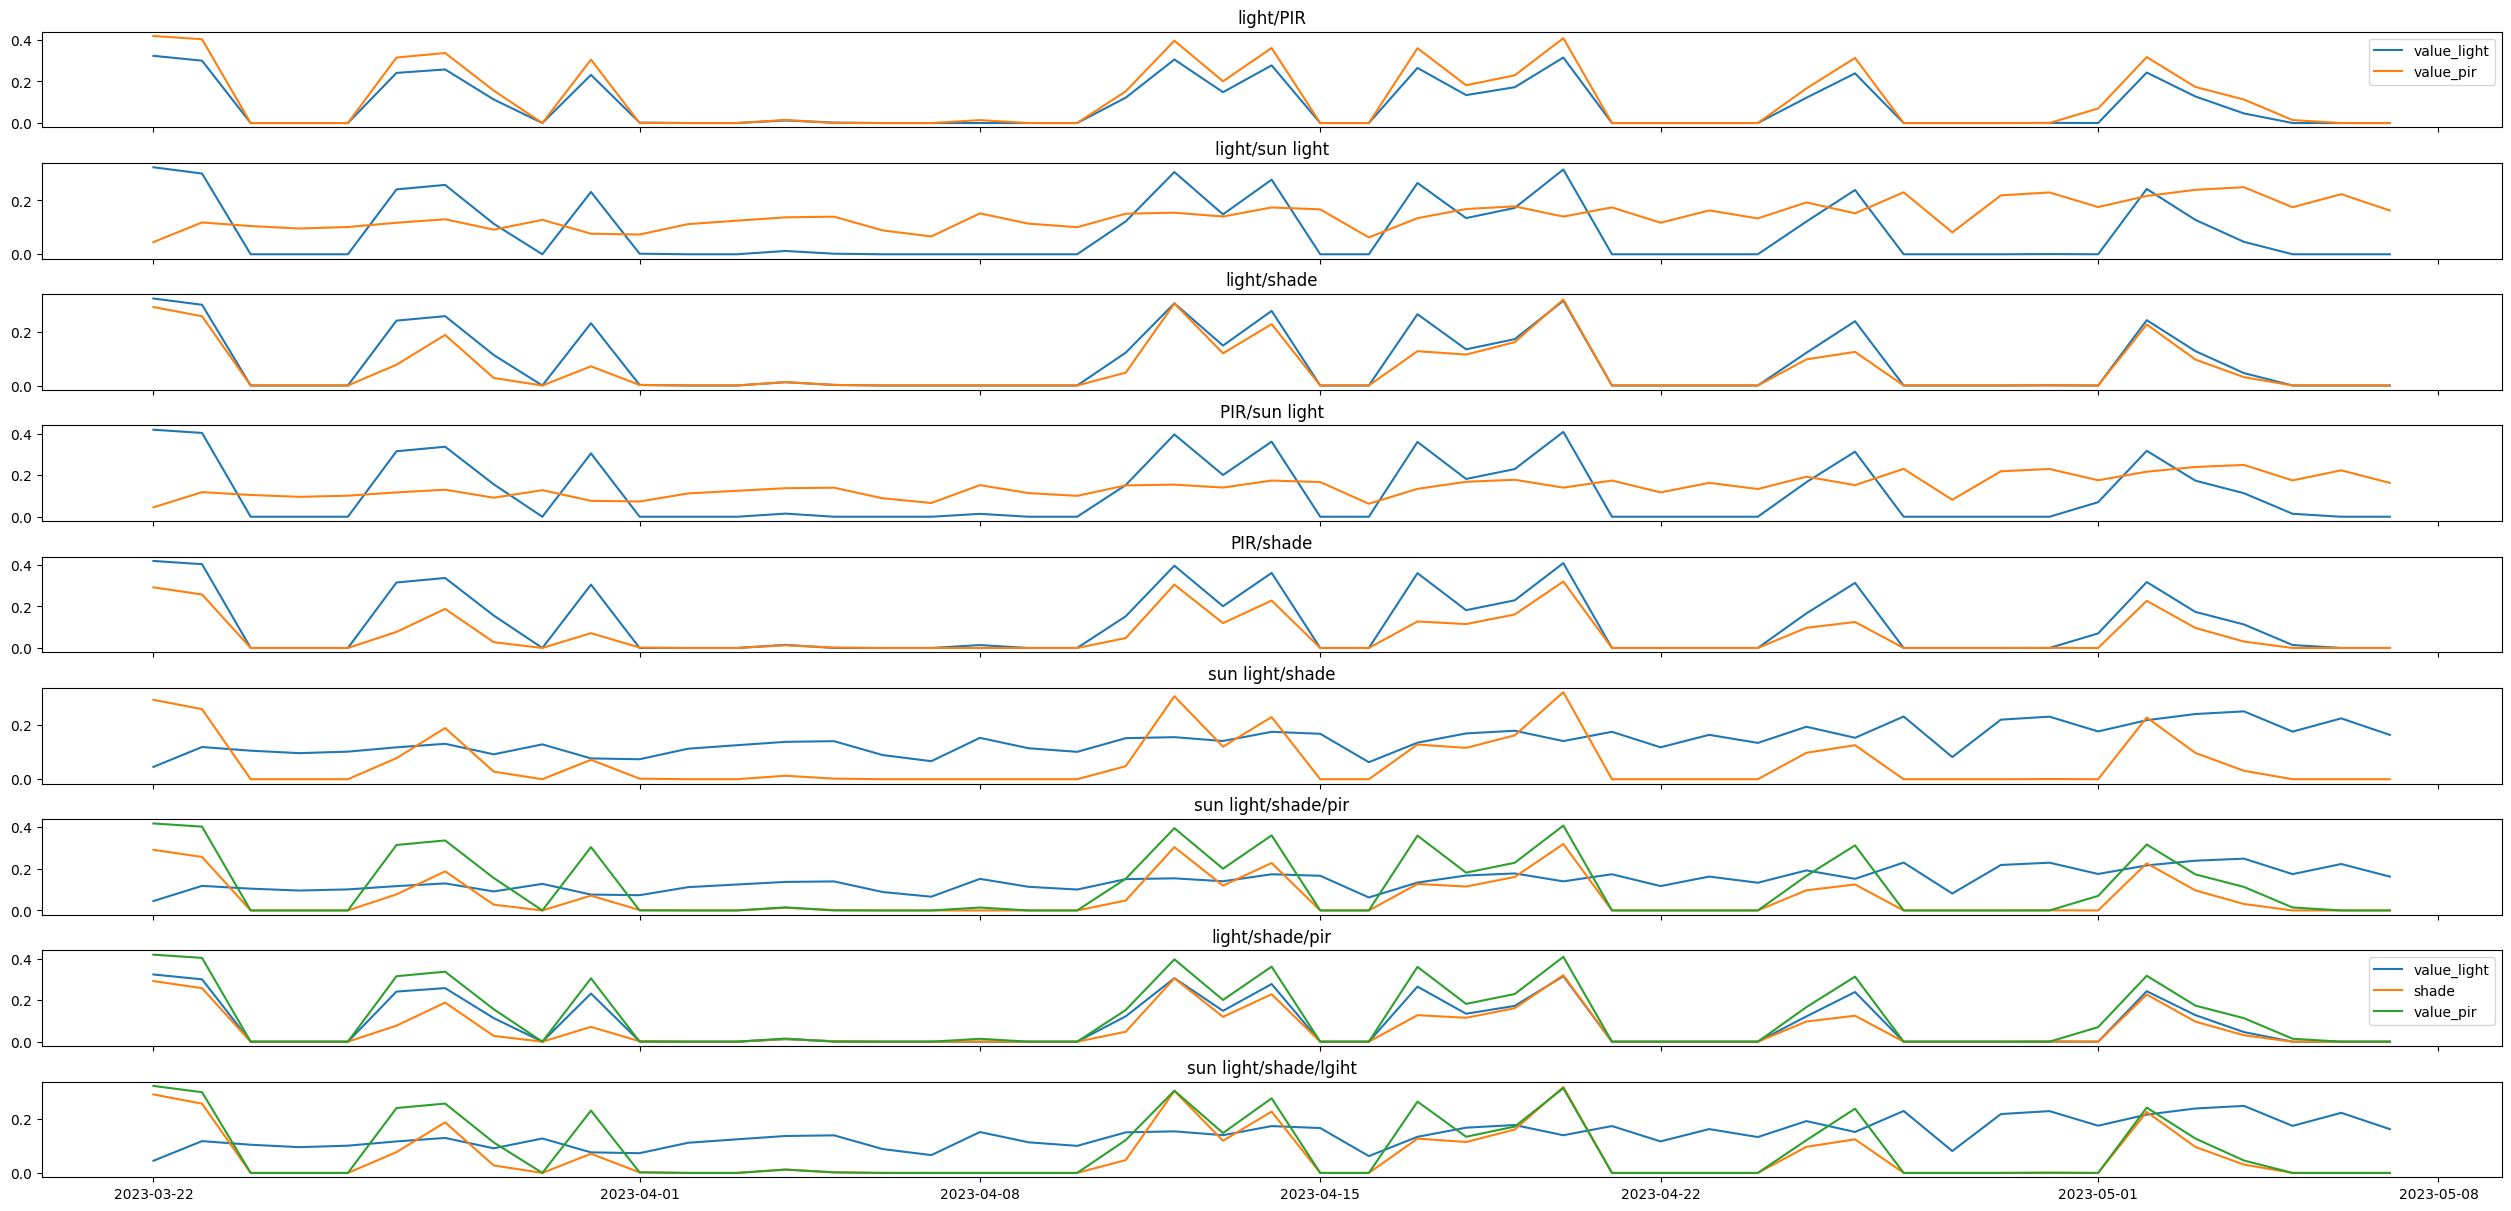

In [130]:
fig, axs = plt.subplots(9, constrained_layout=True, sharex=True, sharey=False, figsize=(25, 12))
axs[0].plot(result6[['value_light','value_pir']])
axs[0].set_title('light/PIR')
axs[0].legend(['value_light', 'value_pir'])


axs[1].plot(result6[['value_light','value_sunlight']])
axs[1].set_title('light/sun light')

axs[2].plot(result6[['value_light','shade']])
axs[2].set_title('light/shade')

axs[3].plot(result6[['value_pir','value_sunlight']])
axs[3].set_title('PIR/sun light')

axs[4].plot(result6[['value_pir','shade']])
axs[4].set_title('PIR/shade')

axs[5].plot(result6[['value_sunlight','shade']])
axs[5].set_title('sun light/shade')

axs[6].plot(result6[['value_sunlight','shade', 'value_pir']])
axs[6].set_title('sun light/shade/pir')

axs[7].plot(result6[['value_light','shade', 'value_pir']])
axs[7].set_title('light/shade/pir')
axs[7].legend(['value_light','shade', 'value_pir'])

axs[8].plot(result6[['value_sunlight','shade', 'value_light']])
axs[8].set_title('sun light/shade/lgiht')

[Text(0.5, 1.0, 'Correlation matrix of the sensor data collected at each day')]

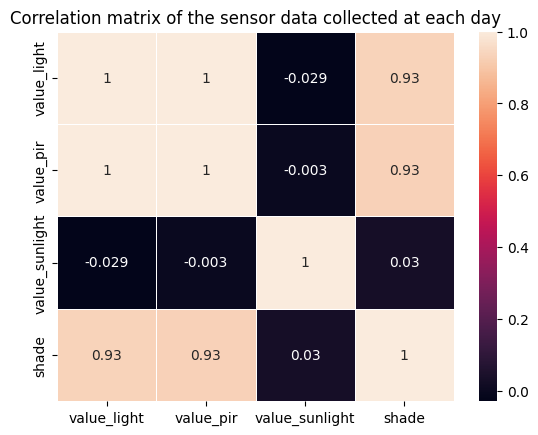

In [139]:
sns.heatmap(result6.corr(), annot=True, linewidth=.5).set(title='Correlation matrix of the sensor data collected at each day')

<Axes: >

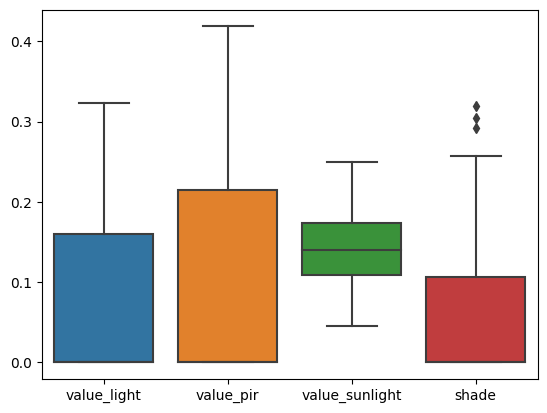

In [132]:
sns.boxplot(result6).set(title='Title of Plot')
